In [ ]:

import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import json

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px


import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


from sklearn import manifold

In [ ]:
atm=pd.read_csv("//content/attempts.csv")
dfn=pd.read_csv("//content/defending.csv")
dsp=pd.read_csv("//content/disciplinary.csv")
dis=pd.read_csv("//content/distributon.csv")
gk=pd.read_csv("//content/goalkeeping.csv")
gl=pd.read_csv("//content/goals.csv")
ks=pd.read_csv("//content/key_stats.csv")
atkg=pd.read_csv("//content/attacking.csv")
g2=pd.read_csv("//content/disciplinary.csv")



In [ ]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   serial               627 non-null    int64 
 1   player_name          627 non-null    object
 2   club                 627 non-null    object
 3   position             627 non-null    object
 4   balls_recoverd       627 non-null    int64 
 5   tackles              627 non-null    int64 
 6   t_won                627 non-null    int64 
 7   t_lost               627 non-null    int64 
 8   clearance_attempted  627 non-null    int64 
 9   match_played         627 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 49.1+ KB


In [ ]:
dfn.head()

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10
3,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12


In [ ]:
atm.head()


,serial,player_name,club,position,total_attempts,on_target,off_target,blocked,match_played
0,1,Benzema,Real Madrid,Forward,45,23,13,9,12
1,2,Salah,Liverpool,Forward,42,22,11,9,13
2,3,Mahrez,Man. City,Midfielder,37,18,8,11,12
3,4,Sané,Bayern,Midfielder,33,13,12,8,10
4,5,Lewandowski,Bayern,Forward,31,19,8,4,10


In [ ]:
ks.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
66,Lewandowski,Bayern,Forward,876,10,13,3,99.7
102,Haller,Ajax,Forward,668,8,11,1,82.2
26,Salah,Liverpool,Forward,1008,13,8,2,112.0
184,Nkunku,Leipzig,Midfielder,531,6,7,0,62.8


In [ ]:
ks.describe().T

,count,mean,std,min,25%,50%,75%,max
minutes_played,747.0,331.611780,248.371930,1.0,116.0,301.0,492.0,1230.0
match_played,747.0,5.089692,2.721425,1.0,3.0,5.0,7.0,13.0
goals,747.0,0.492637,1.313321,0.0,0.0,0.0,0.0,15.0
assists,747.0,0.376171,0.845502,0.0,0.0,0.0,0.0,7.0


from matplotlib import pyplot as plt
_df_0['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['25%'].plot(kind='hist', bins=20, title='25%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='25%', y='50%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('count', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('count', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('count', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['25%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('count', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('25%')

from matplotlib import pyplot as plt
_df_13['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['25%'].plot(kind='line', figsize=(8, 4), title='25%')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='mean', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='std', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='min', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='25%', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

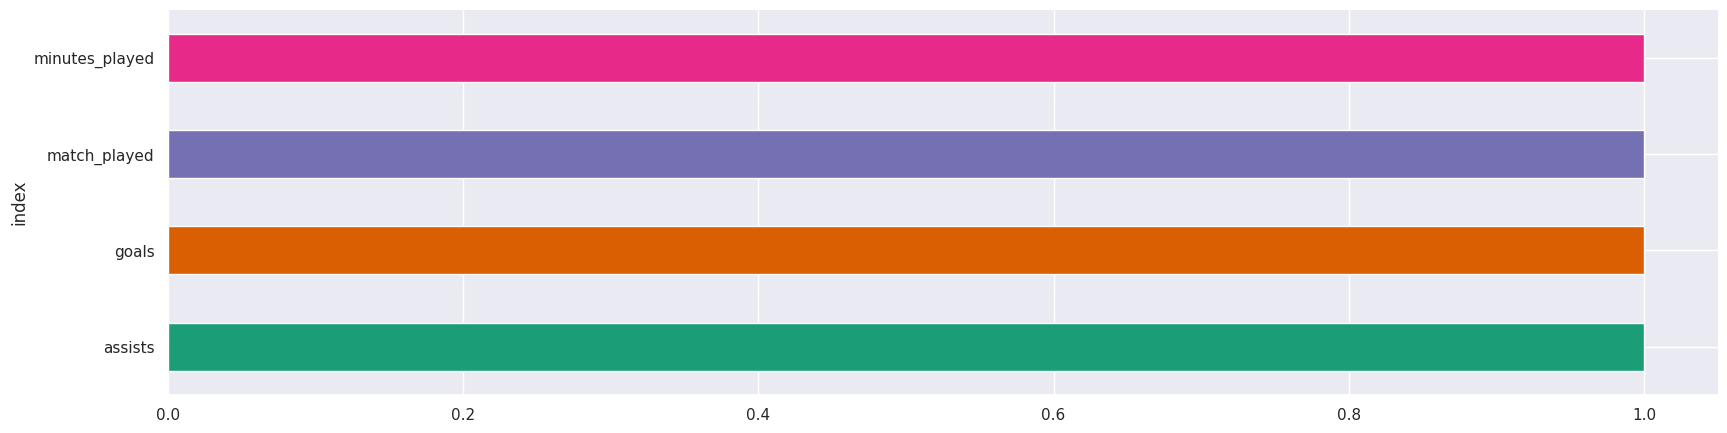

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
ks.describe(include=['object']).T

,count,unique,top,freq
player_name,747,731,Martínez,3
club,747,32,Man. United,31
position,747,4,Midfielder,287
distance_covered,747,514,3.6,5


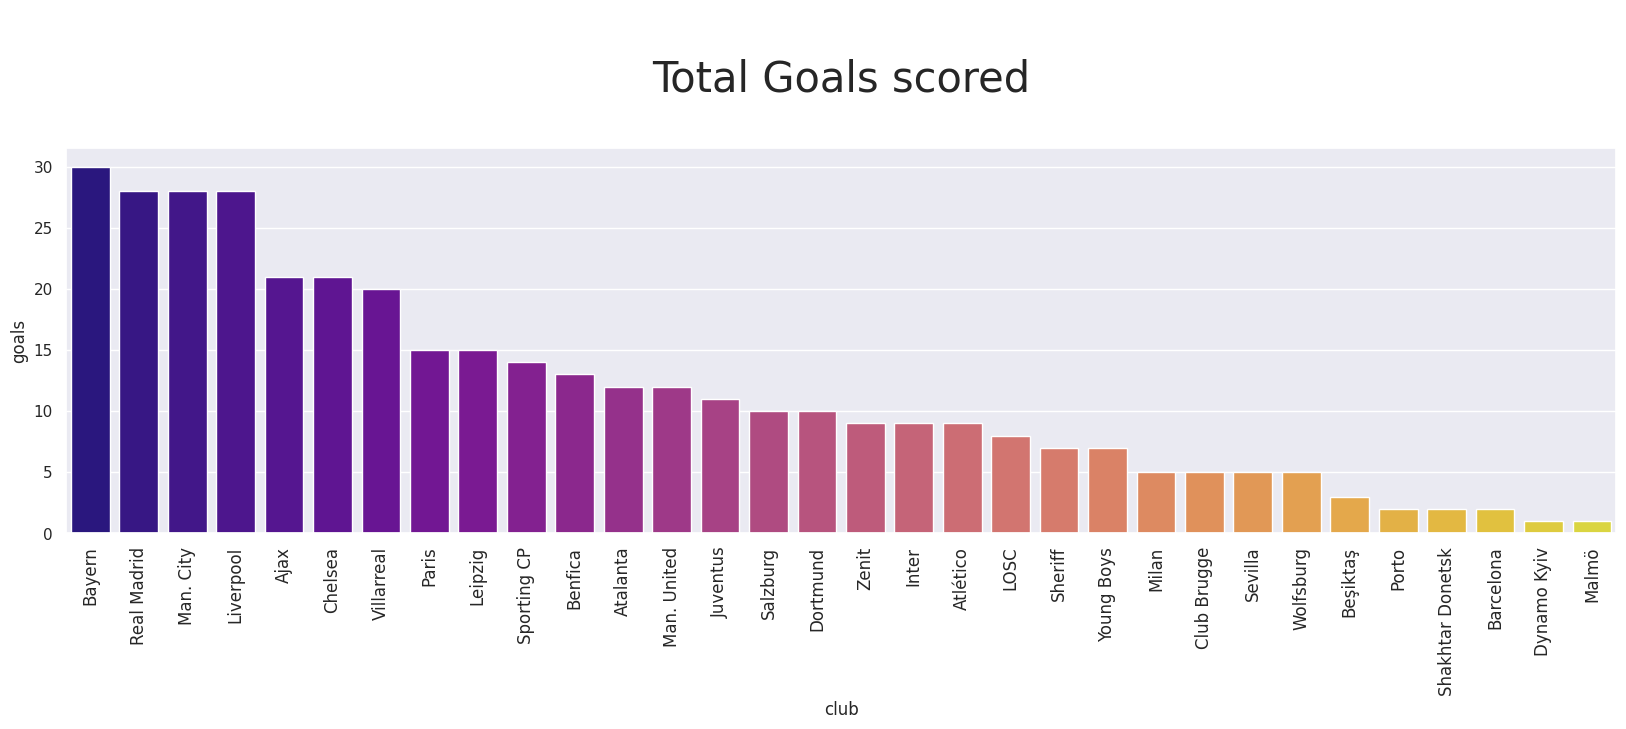

In [ ]:
tks=ks.groupby('club',as_index = False)["goals"].sum().sort_values(by='goals',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12,rotation='vertical')
p=sns.barplot(x="club", y="goals", data=tks,palette="plasma",capsize=.2)
p.axes.set_title("\nTotal Goals scored\n",fontsize=30);

In [ ]:
fig = px.treemap(tks, path=['club'],values='goals', width=1200, height=400, title="\nTotal Goals scored per club")
fig.update_layout(
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()

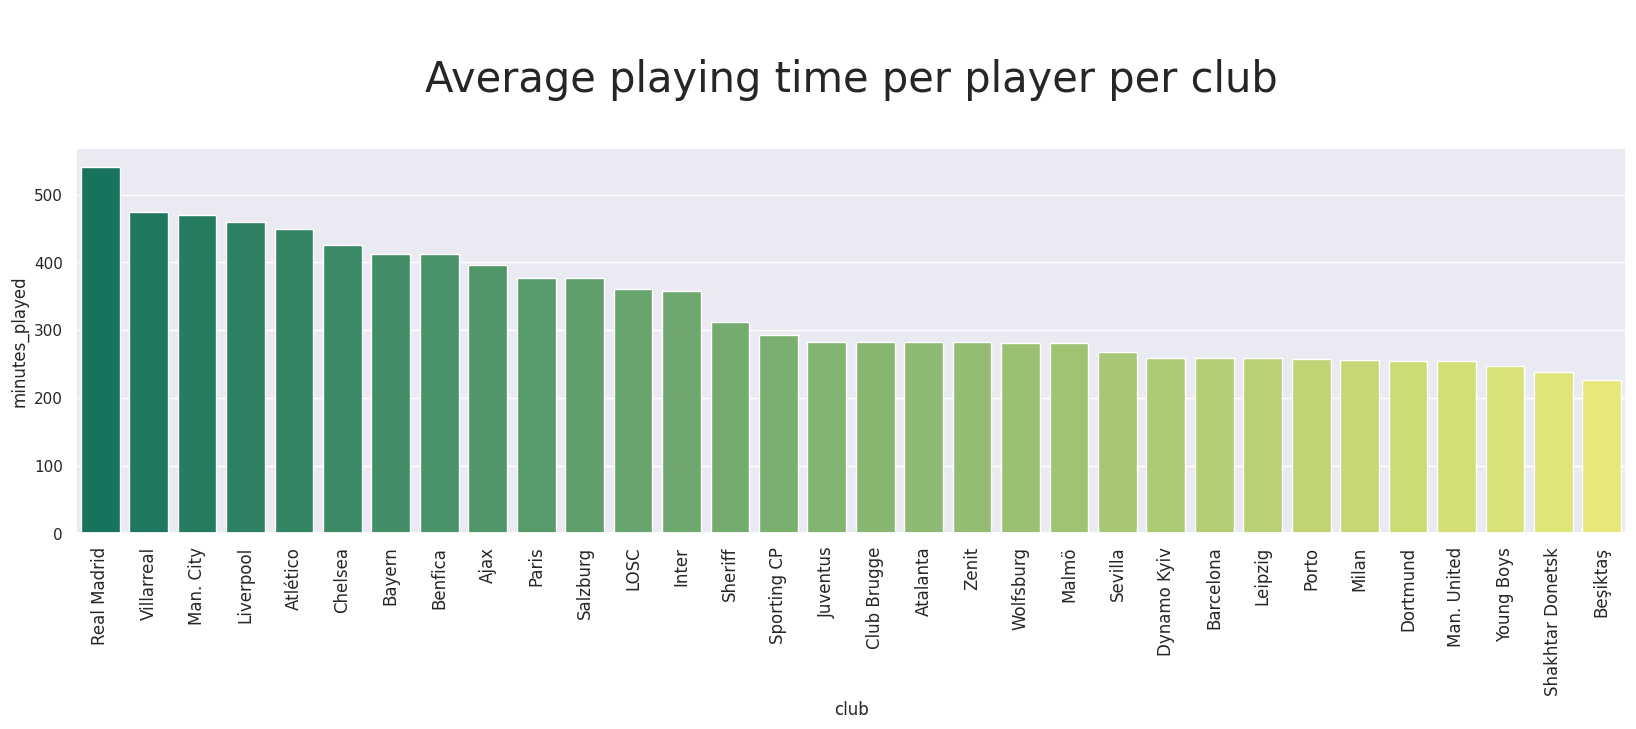

In [ ]:
#Average playing time per player per club
tks=ks.groupby('club',as_index = False)["minutes_played"].mean().sort_values(by='minutes_played',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12,rotation='vertical')
p=sns.barplot(x="club", y="minutes_played", data=tks,palette="summer",capsize=.2)
p.axes.set_title("\nAverage playing time per player per club\n",fontsize=30);

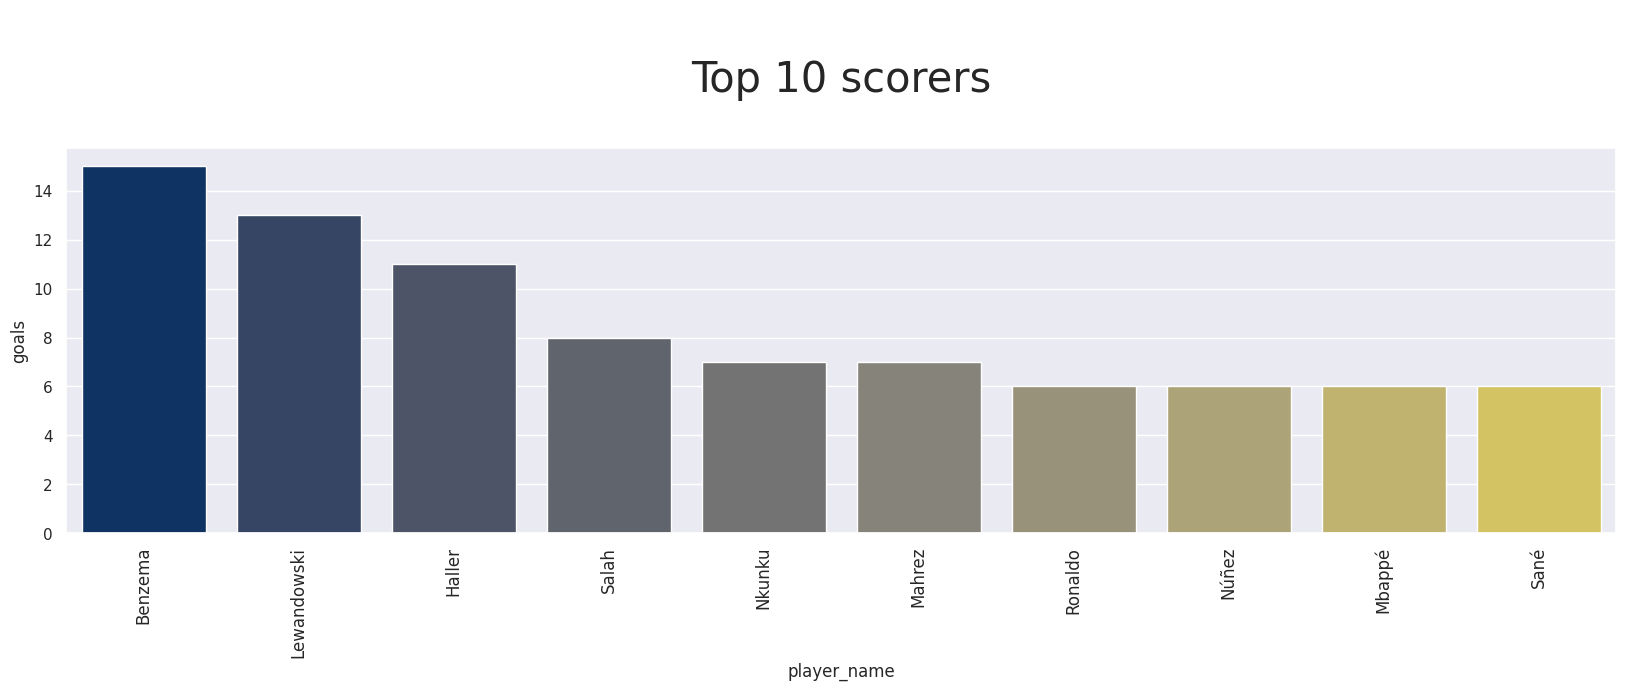

In [ ]:
#top 10 scorers
ks=ks.sort_values(by='goals',ascending=False)
tks=ks[:10]
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12,rotation='vertical')
p=sns.barplot(x="player_name", y="goals", data=tks,palette="cividis",capsize=2)
p.axes.set_title("\nTop 10 scorers\n",fontsize=30);

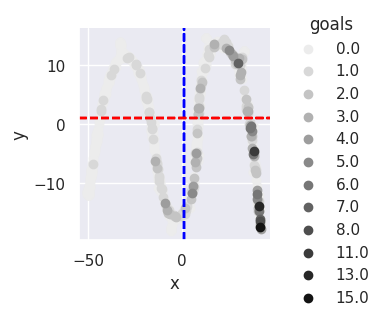

In [ ]:
#Unsupervised Testing with TSNE (Goals)
#relacing nulls with 0
ks=ks.replace(to_replace="-", value=0)

#TSNE class, 2 coomppotents for easy visualization
tsne = manifold.TSNE(n_components=2, random_state=42)

#transforming data
transformed_data = tsne.fit_transform(ks[["minutes_played","match_played","distance_covered"]])
tsne_df = pd.DataFrame(np.column_stack((transformed_data, ks["goals"])),columns=["x",'y',"goals"])
tsne_df.loc[:, "goals"] = tsne_df.goals.astype(int)

#plotting TSNE transformed data
sns.set(rc={'figure.figsize':(15,10)})
grid =sns.FacetGrid(tsne_df, hue="goals",palette='binary')
grid.map(plt.scatter, "x", "y").add_legend()
grid.refline(x=tsne_df["goals"].quantile(0.9), color='blue')
grid.refline(y=tsne_df["goals"].quantile(0.9), color='red');

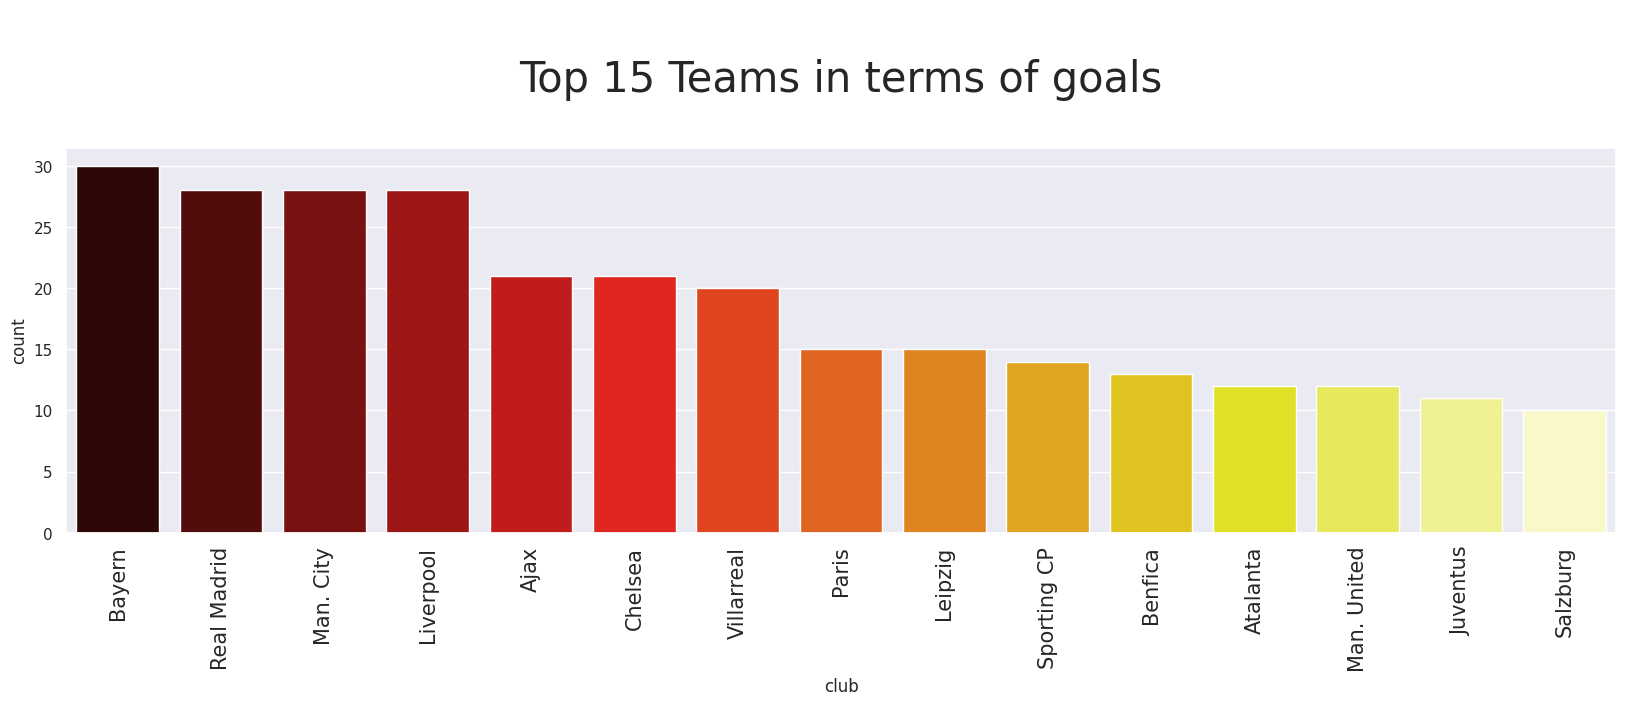

In [ ]:
#top 15 teams in terms of goals
g1=ks.groupby('club')['goals'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
g1=g1[:15]
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="count", data=g1,palette="hot",capsize=2)
p.axes.set_title("\nTop 15 Teams in terms of goals\n",fontsize=30);

In [ ]:
#goal type analysis
gl_sum = pd.DataFrame(gl.sum(numeric_only = True),).T[["right_foot","left_foot","headers","others"]]
gl_sum=gl_sum.T
fig = px.pie(gl_sum, values=0, names=gl_sum.index, title=' Goal types analysis (How scored)', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [ ]:
#from where the goals were scored
gl_sum = pd.DataFrame(gl.sum(numeric_only = True),).T[["inside_area","outside_areas","penalties"]]
gl_sum=gl_sum.T
fig = px.pie(gl_sum, values=0, names=gl_sum.index, title='Goal types analysis (From where scored)')
fig.show()

Text(0.5, 1.0, '\nGoals per playing position\n')

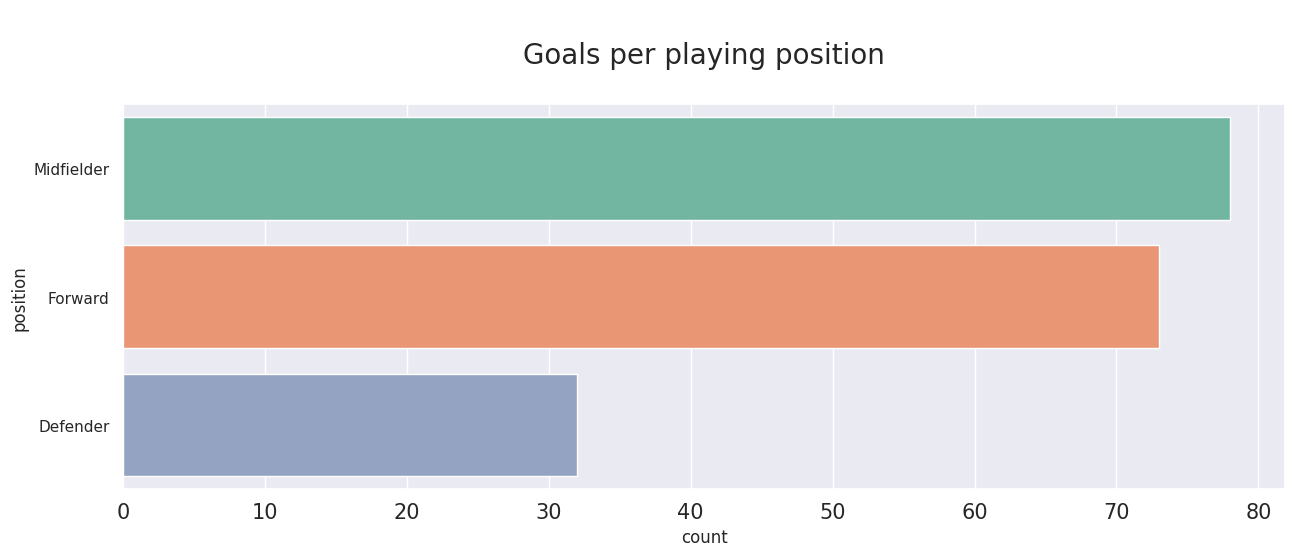

In [ ]:
#goal scored by the players (position wise)
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=15)
p=sns.countplot(gl['position'],hue_order=gl.groupby('position'),order=gl.position.value_counts().sort_values(ascending=False).index,palette="Set2")
p.axes.set_title("\nGoals per playing position\n",fontsize=20)

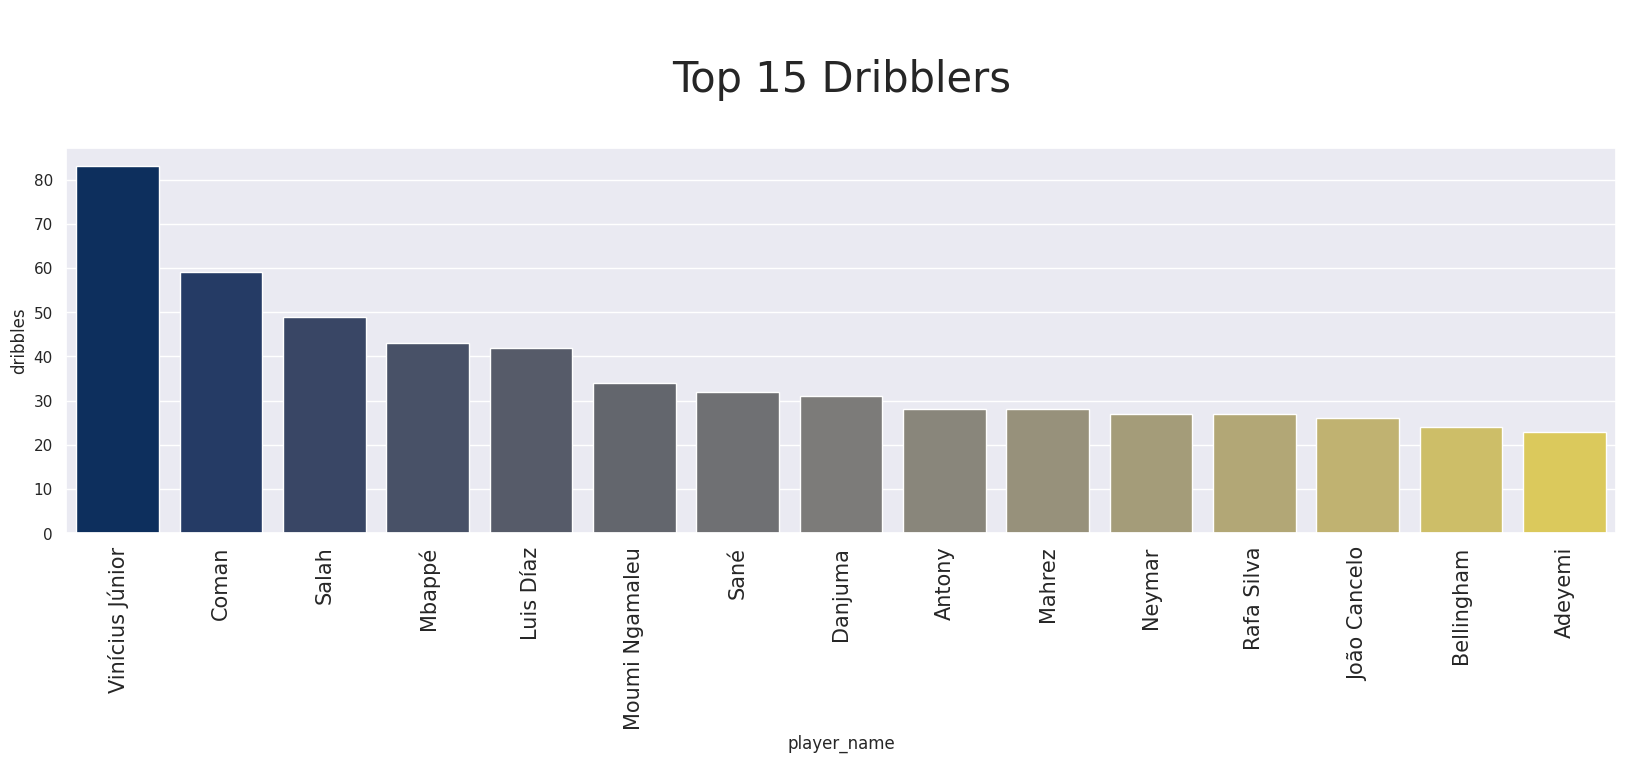

In [ ]:
#top 15 dribblers
atkg=atkg.sort_values(by='dribbles',ascending=False)
t=atkg[:15]
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="dribbles", data=t,palette="cividis",capsize=2)
p.axes.set_title("\nTop 15 Dribblers\n",fontsize=30);

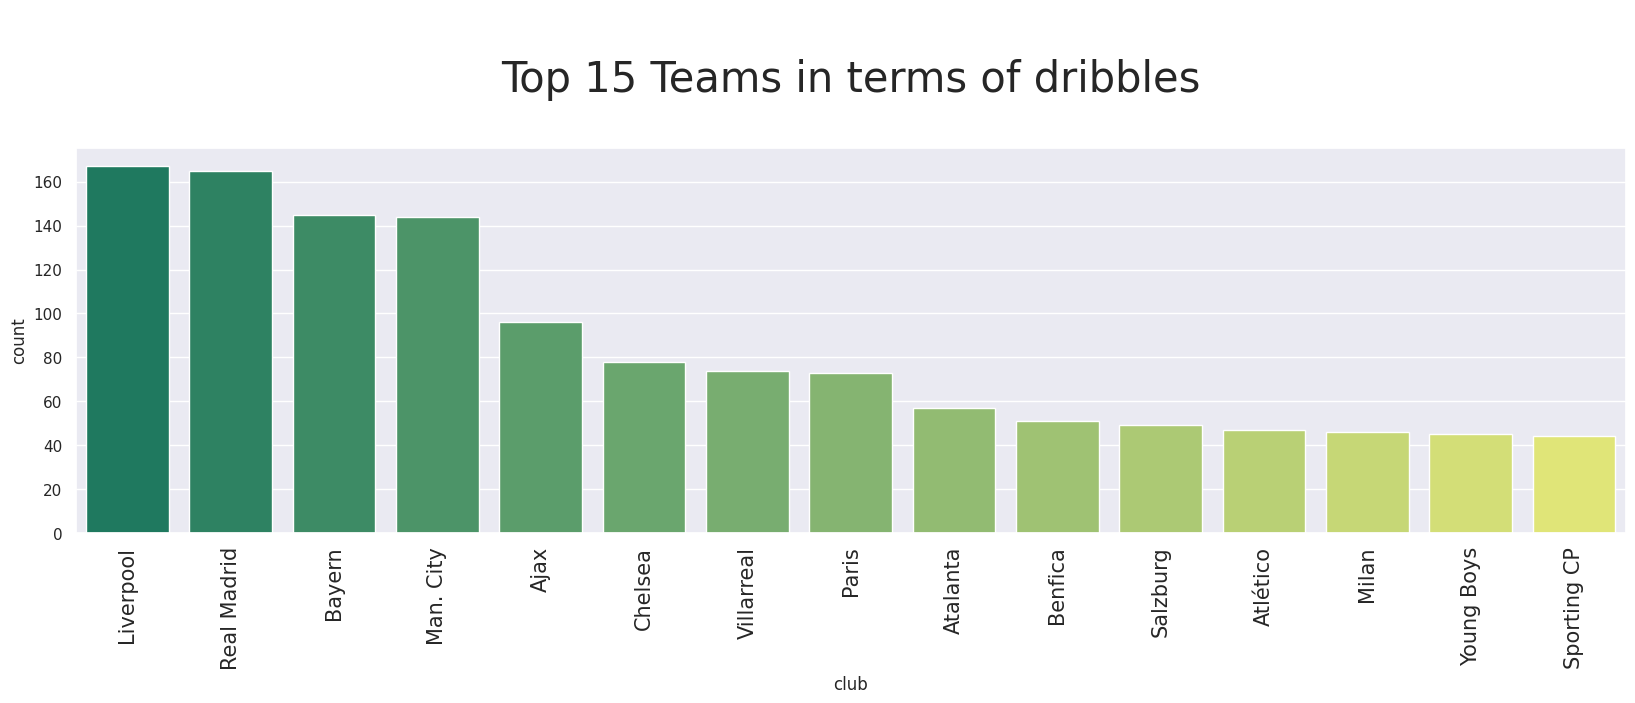

In [ ]:
#team dribbles
g1=atkg.groupby('club')['dribbles'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
g1=g1[:15]
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="count", data=g1,palette="summer",capsize=2)
p.axes.set_title("\nTop 15 Teams in terms of dribbles\n",fontsize=30);

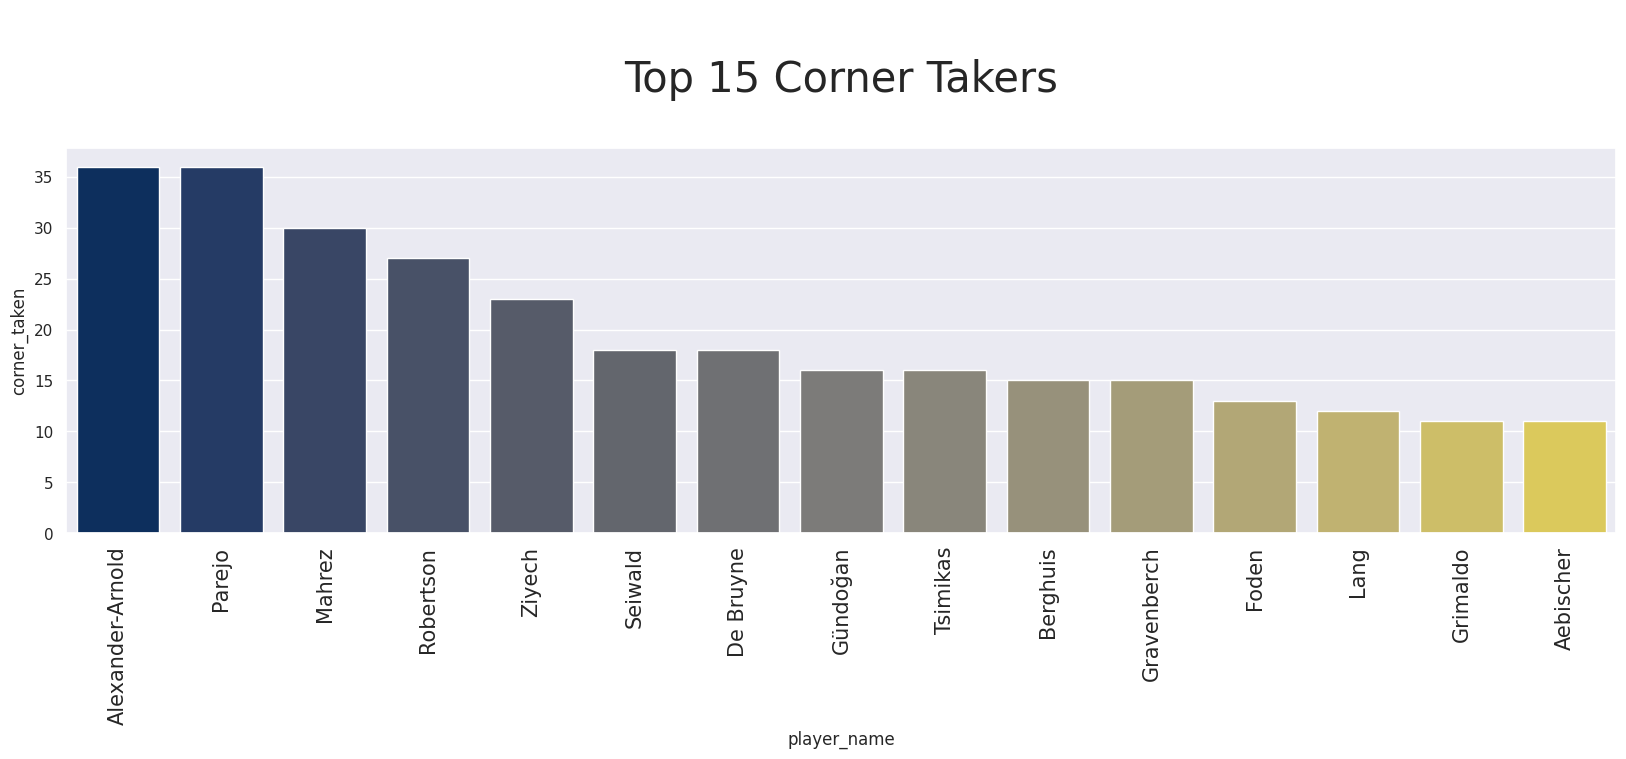

In [ ]:
#top 15 players to take corner
atkg=atkg.sort_values(by='corner_taken',ascending=False)
t=atkg[:15]
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="corner_taken", data=t,palette="cividis",capsize=2)
p.axes.set_title("\nTop 15 Corner Takers\n",fontsize=30);

In [ ]:
#ball recovery by players according to their position
g1=dfn.groupby('position')['balls_recoverd'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
sns.set(rc={'figure.figsize':(10,10)})
fig = px.pie(g1, values="count", names=g1.position, title='Ball recovery analysis')
fig.show()

In [ ]:
#tackle won/lose ratio
gl_sum = pd.DataFrame(dfn.sum(numeric_only = True),).T[["t_won","t_lost"]]
gl_sum=gl_sum.T
fig = px.pie(gl_sum, values=0, names=gl_sum.index, title='Tackle WON vs LOST',color_discrete_sequence=px.colors.sequential.YlOrRd)
fig.show()

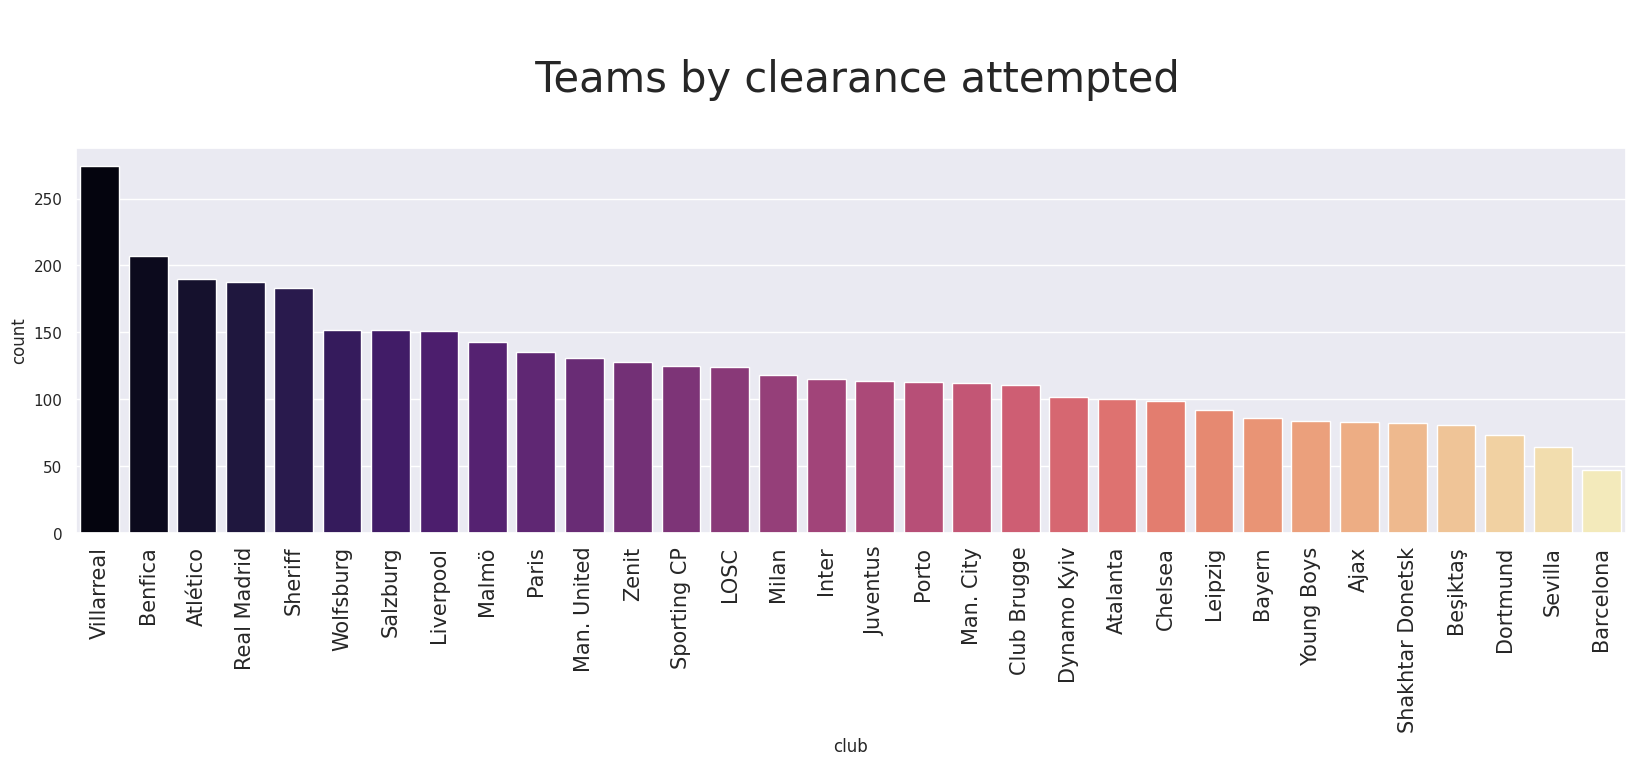

In [ ]:
#clearance per club
g1=dfn.groupby('club')['clearance_attempted'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="count", data=g1,palette="magma",capsize=2)
p.axes.set_title("\n Teams by clearance attempted\n",fontsize=30);

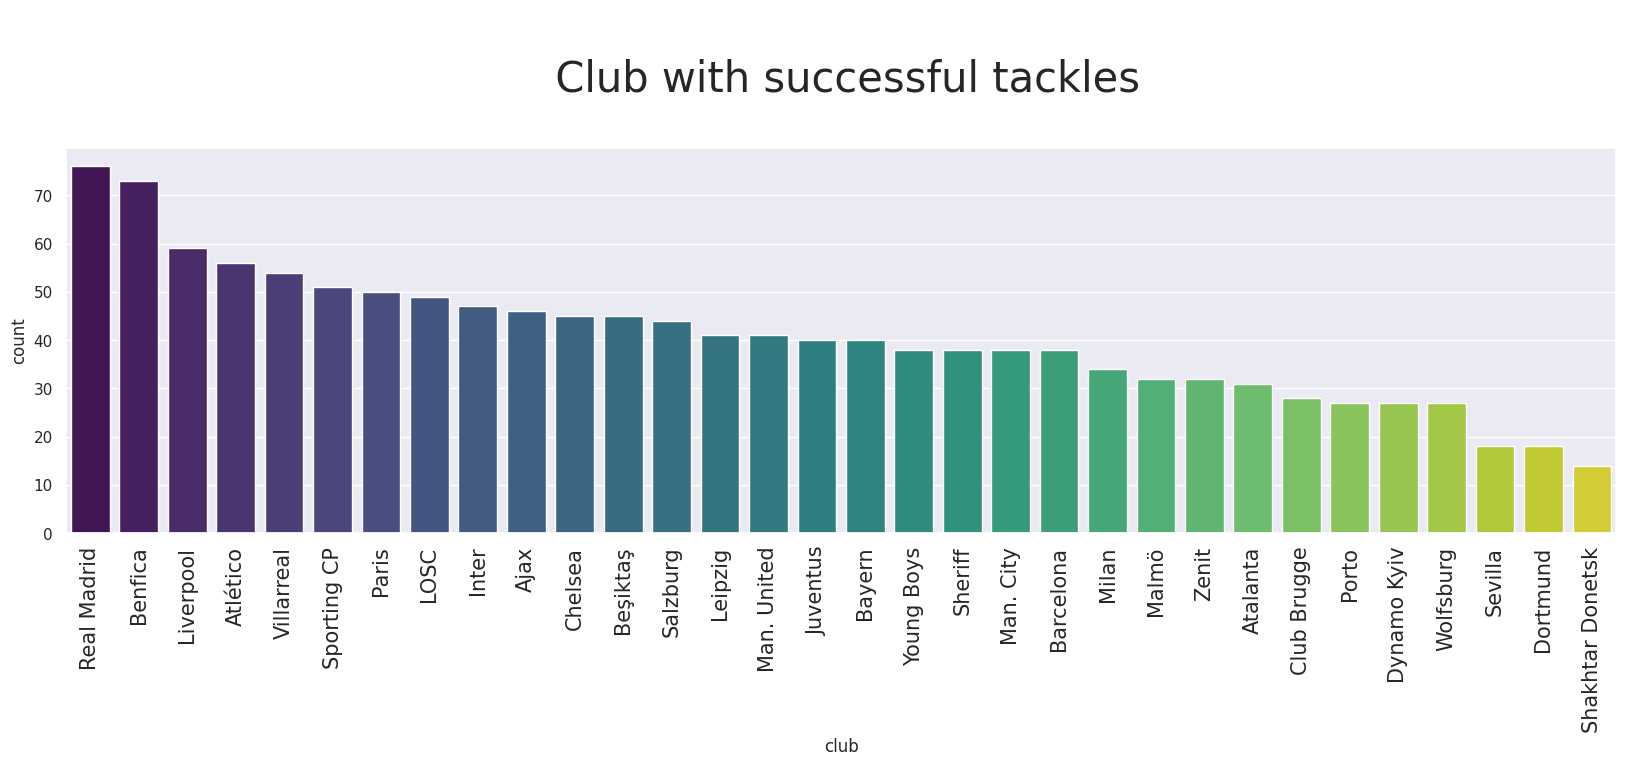

In [ ]:
#clubs with successful tackle
g1=dfn.groupby('club')['t_won'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="count", data=g1,palette="viridis",capsize=2)
p.axes.set_title("\n Club with successful tackles\n",fontsize=30);

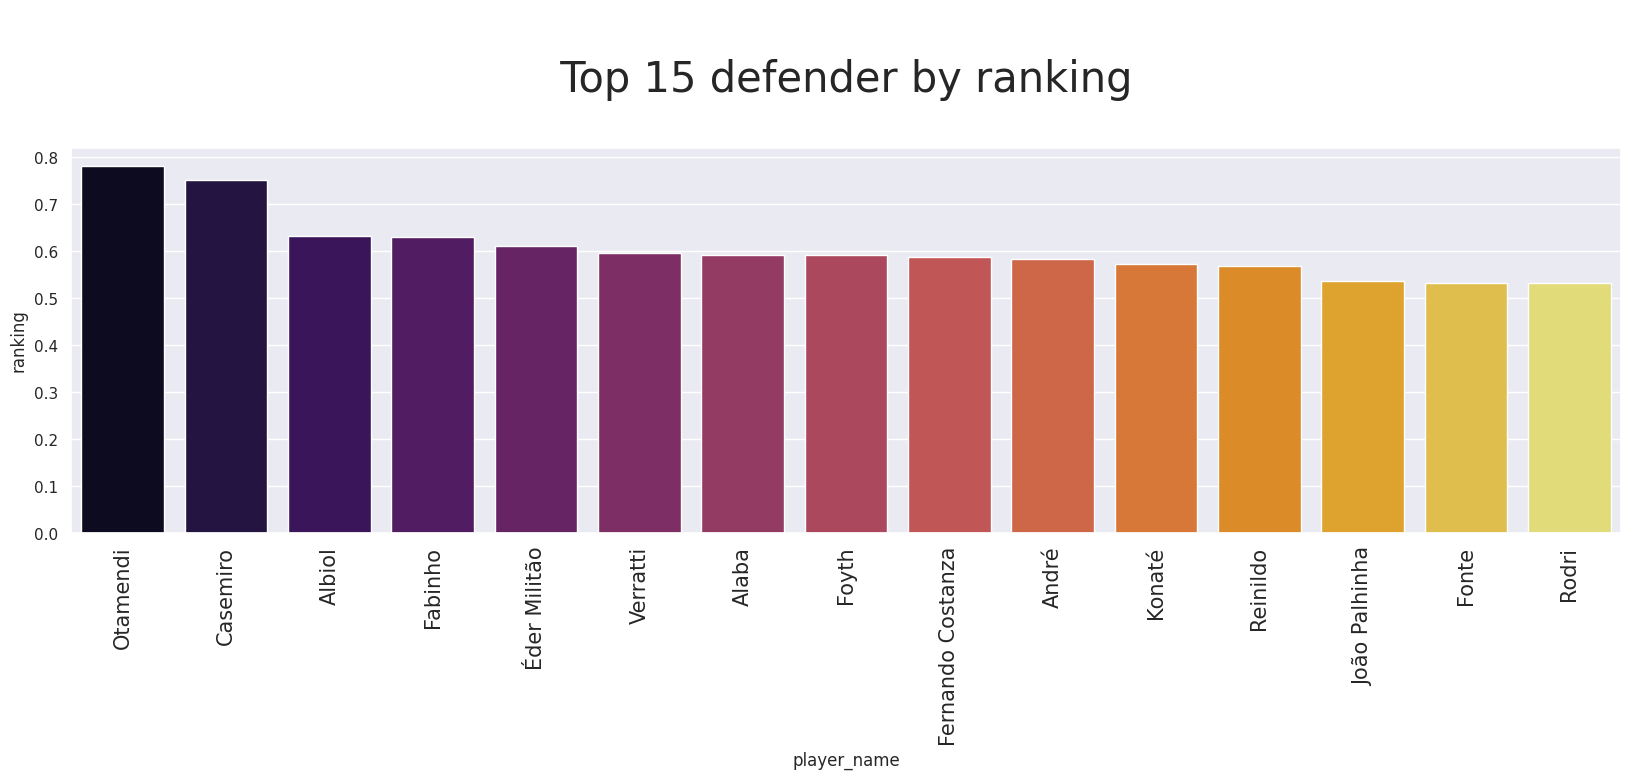

In [ ]:
#top 15 def rank
dfn['ranking']=(dfn['balls_recoverd']/dfn['balls_recoverd'].max())*0.3+(dfn['tackles']/dfn['tackles'].max())*0.3+(dfn['t_won']/dfn['tackles'])*0.2+(dfn['t_won']/dfn['t_won'].max())*0.1+(dfn['clearance_attempted']/dfn['clearance_attempted'].max())*0.1
dfnx=dfn.sort_values('ranking',ascending=False)
dfnx=dfnx[:15]
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="ranking", data=dfnx,palette="inferno",capsize=2)
p.axes.set_title("\n Top 15 defender by ranking \n",fontsize=30);

In [ ]:
#attacking attempts analysis
gl_sum = pd.DataFrame(atm.sum(numeric_only = True),).T[["on_target","off_target","blocked"]]
gl_sum=gl_sum.T
fig = px.pie(gl_sum, values=0, names=gl_sum.index, title='Attacking Attempts Analysis - Success rate : on_target vs off_target vs blockedT',color_discrete_sequence=px.colors.sequential.YlOrRd)
fig.show()

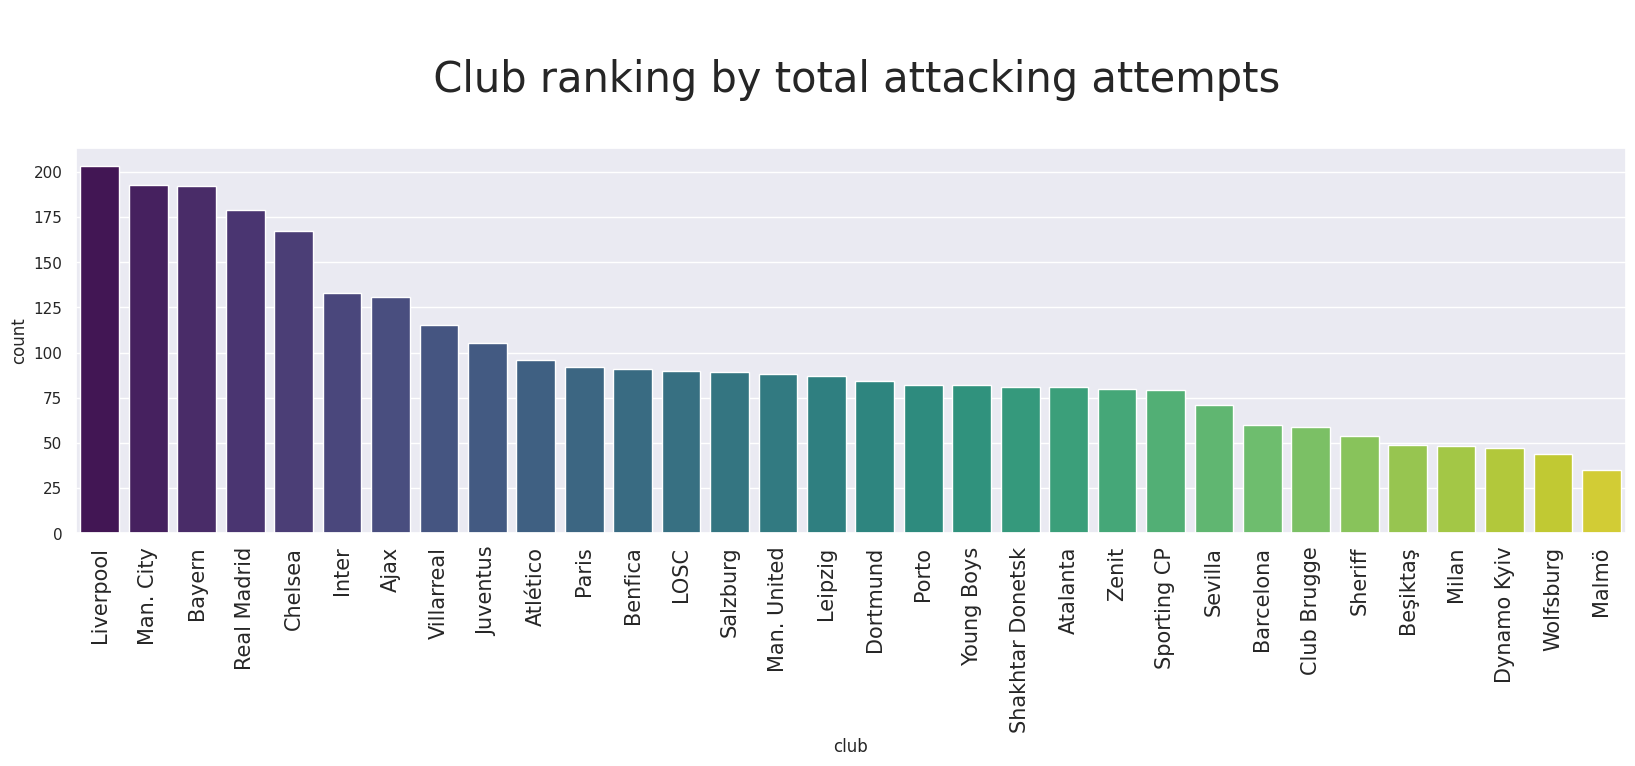

In [ ]:
#rank of clubs ny attacking stats
g1=atm.groupby('club')['total_attempts'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="count", data=g1,palette="viridis",capsize=2)
p.axes.set_title("\n Club ranking by total attacking attempts\n",fontsize=30);


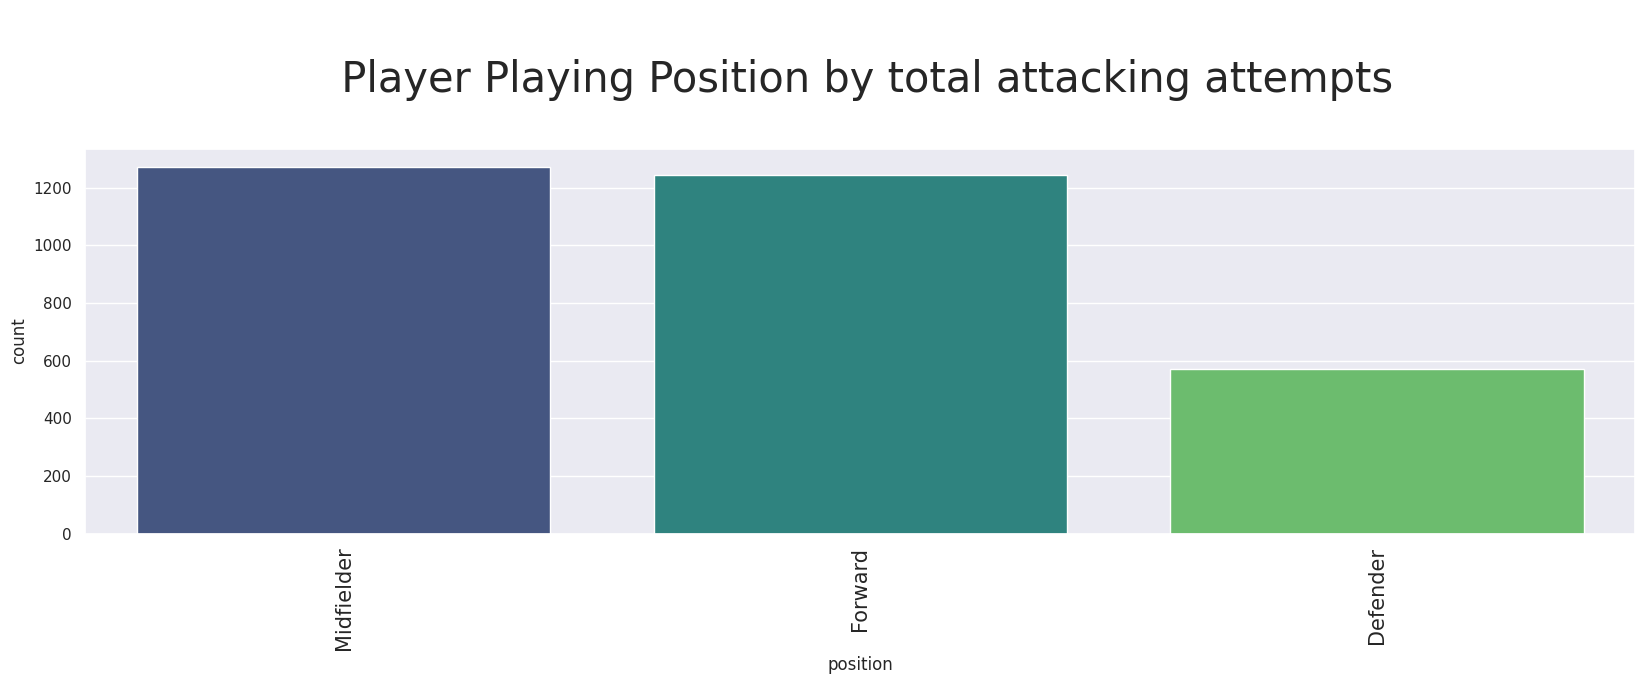

In [ ]:
#player position ranking by attacking attempts stat
g1=atm.groupby('position')['total_attempts'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="position", y="count", data=g1,palette="viridis",capsize=2)
p.axes.set_title("\n Player Playing Position by total attacking attempts\n",fontsize=30);

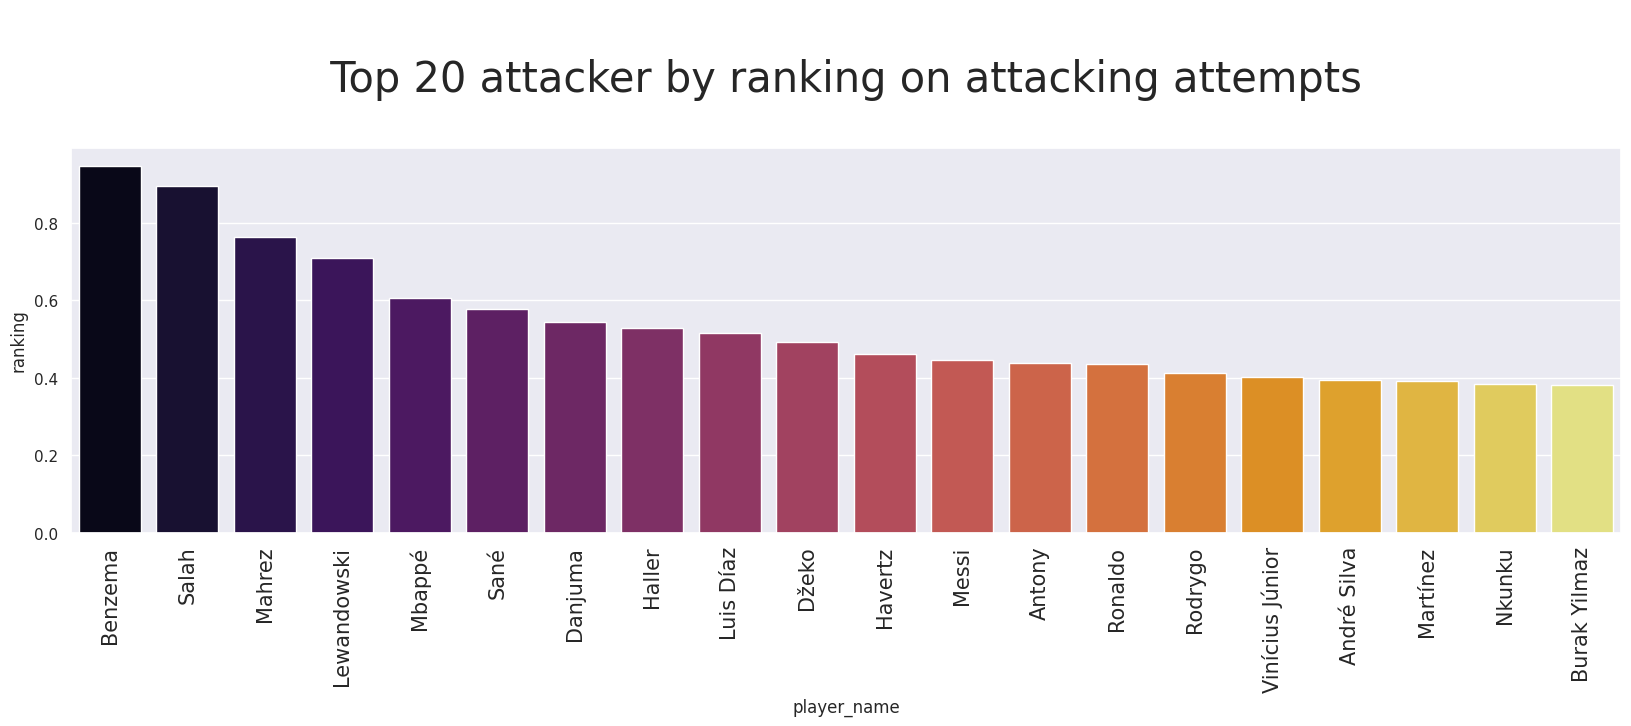

In [ ]:
#top 15 attacker by ranking on attacking attempt
atm['ranking']=(atm['total_attempts']/atm['total_attempts'].max())*0.5+(atm['on_target']/atm['on_target'].max())*0.3+(atm['on_target']/atm['total_attempts'].max())*0.4-(atm['off_target']/atm['total_attempts'])*0.2
dfnx=atm.sort_values('ranking',ascending=False)
dfnx=dfnx[:20]
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="ranking", data=dfnx,palette="inferno",capsize=2)
p.axes.set_title("\n Top 20 attacker by ranking on attacking attempts \n",fontsize=30);

In [ ]:
#overall gk performance
gl_sum = pd.DataFrame(gk.sum(numeric_only = True),).T[["saved","conceded"]]
gl_sum=gl_sum.T
fig = px.pie(gl_sum, values=0, names=gl_sum.index, title='Overall GK Performance',color_discrete_sequence=px.colors.sequential.Reds)
fig.show()

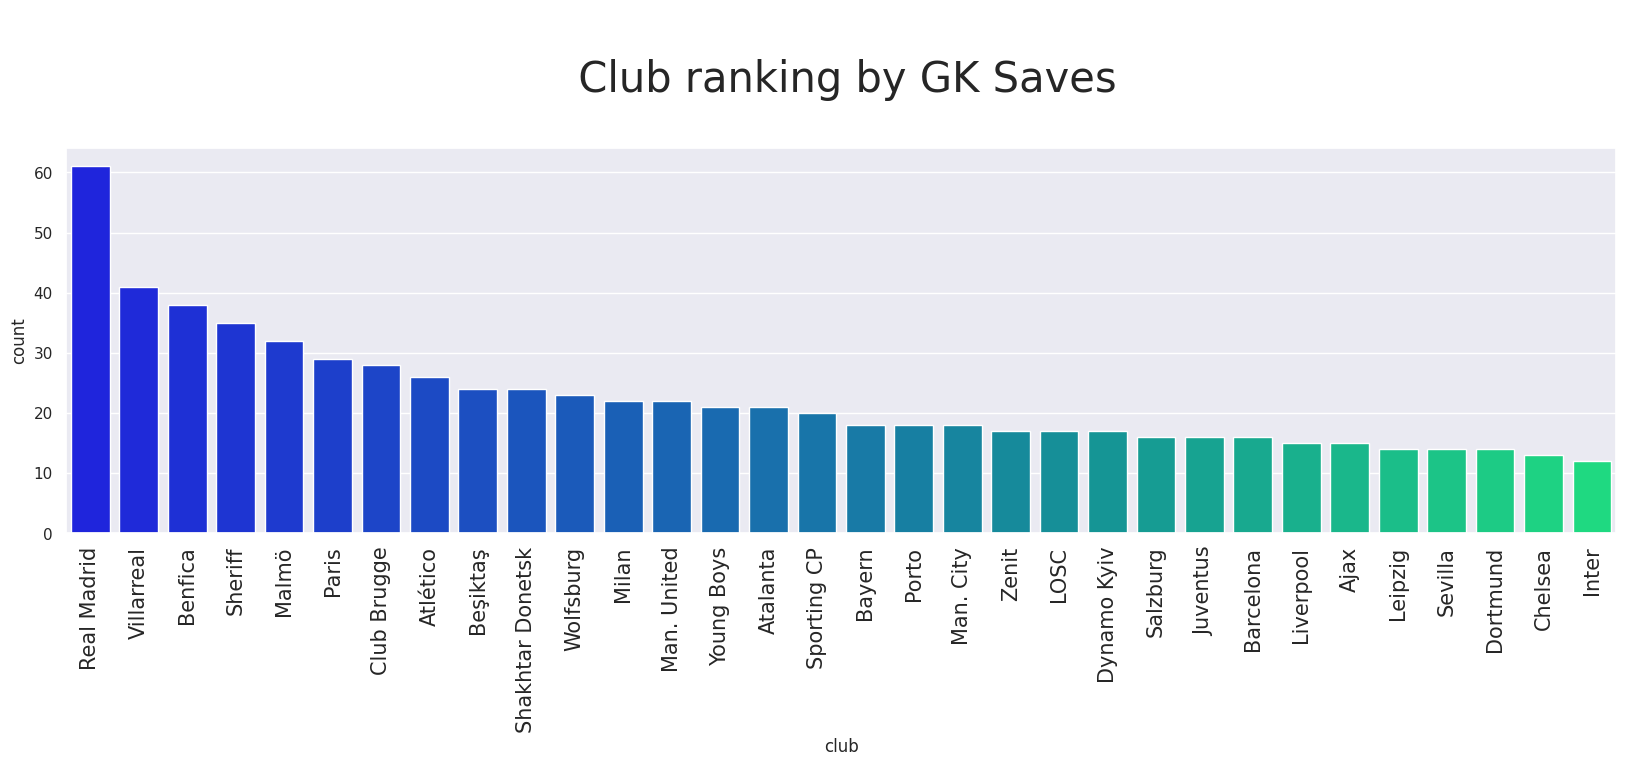

In [ ]:
#club ranking by gk saves
g1=gk.groupby('club')['saved'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="count", data=g1,palette="winter",capsize=2)
p.axes.set_title("\n Club ranking by GK Saves\n",fontsize=30);

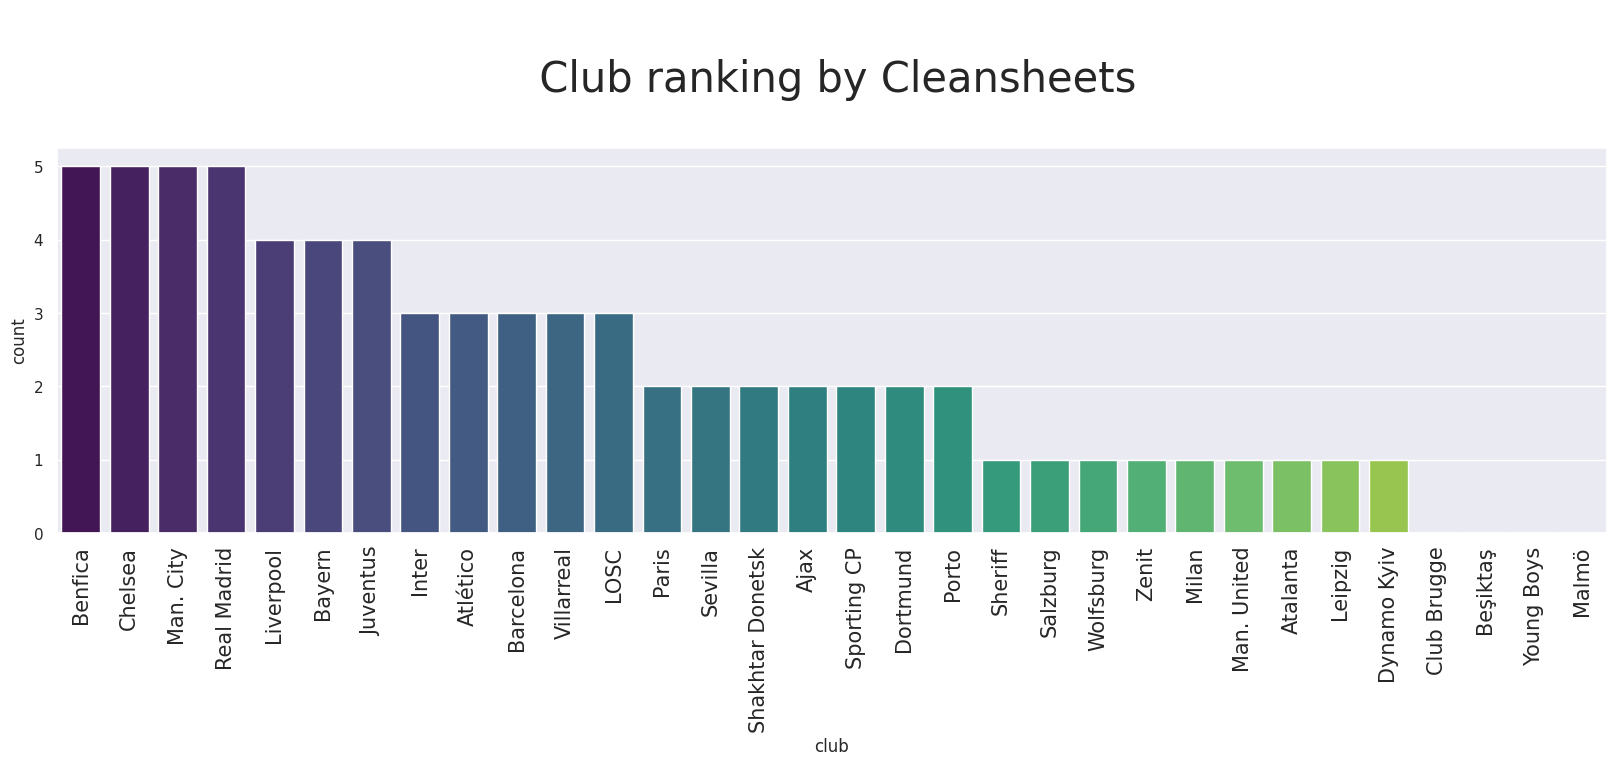

In [ ]:
#club ranking by cleansheets
g1=gk.groupby('club')['cleansheets'].agg('sum').reset_index(name='count').sort_values('count',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="count", data=g1,palette="viridis",capsize=2)
p.axes.set_title("\n Club ranking by Cleansheets\n",fontsize=30);

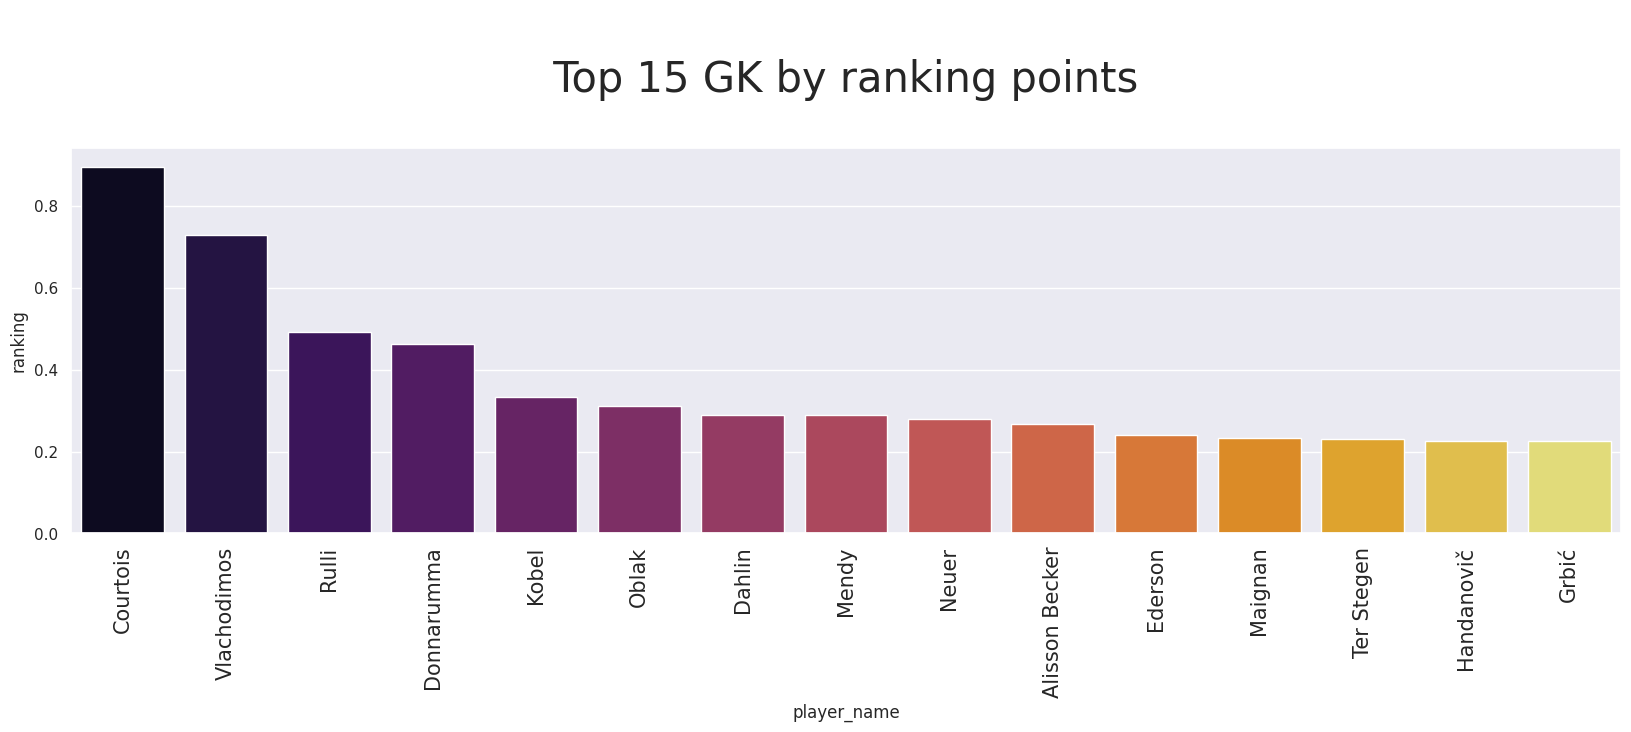

In [ ]:
#top 15 gk in the tournament
gk['ranking']=(gk['saved']/gk['saved'].max())*0.4-(gk['conceded']/(gk['conceded']+gk['saved']))*0.2+(gk['saved_penalties']/gk['saved_penalties'].max())*0.2+(gk['cleansheets']/gk['cleansheets'].max())*0.3+(gk['punches made']/gk['punches made'].max())*0.1


dfnx=gk.sort_values('ranking',ascending=False)
dfnx=dfnx[:15]
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="ranking", data=dfnx,palette="inferno",capsize=2)
p.axes.set_title("\n Top 15 GK by ranking points \n",fontsize=30);

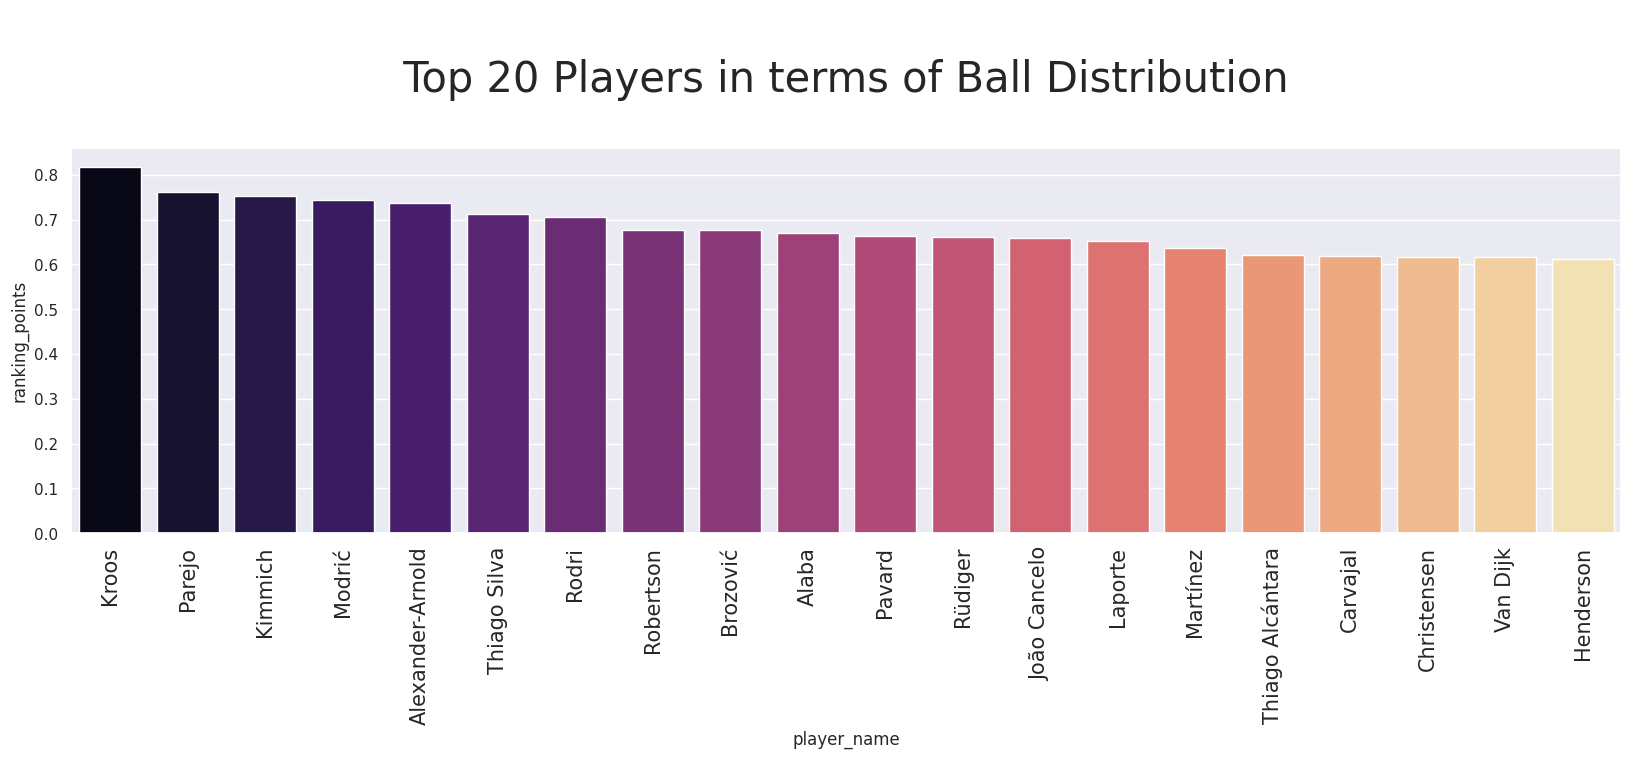

In [ ]:
#ball distribution top 20 players
dis['ranking_points']=(dis['pass_attempted']/dis['pass_attempted'].max())*0.2 +(dis['pass_completed']/dis['pass_completed'].max())*0.2 +(dis['pass_accuracy']/100)*0.3 +(dis['cross_attempted']/dis['cross_attempted'].max())*0.1 +(dis['freekicks_taken']/dis['freekicks_taken'].max())*0.1 +(dis['cross_accuracy']/100)*0.1

dfnx=dis.sort_values('ranking_points',ascending=False)
dfnx=dfnx[:20]
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="ranking_points", data=dfnx,palette="magma",capsize=2)
p.axes.set_title("\n Top 20 Players in terms of Ball Distribution \n",fontsize=30);

In [ ]:
g1=dis.groupby('club')[["pass_attempted","pass_completed","cross_attempted","cross_complted","freekicks_taken"]].agg('sum').reset_index()

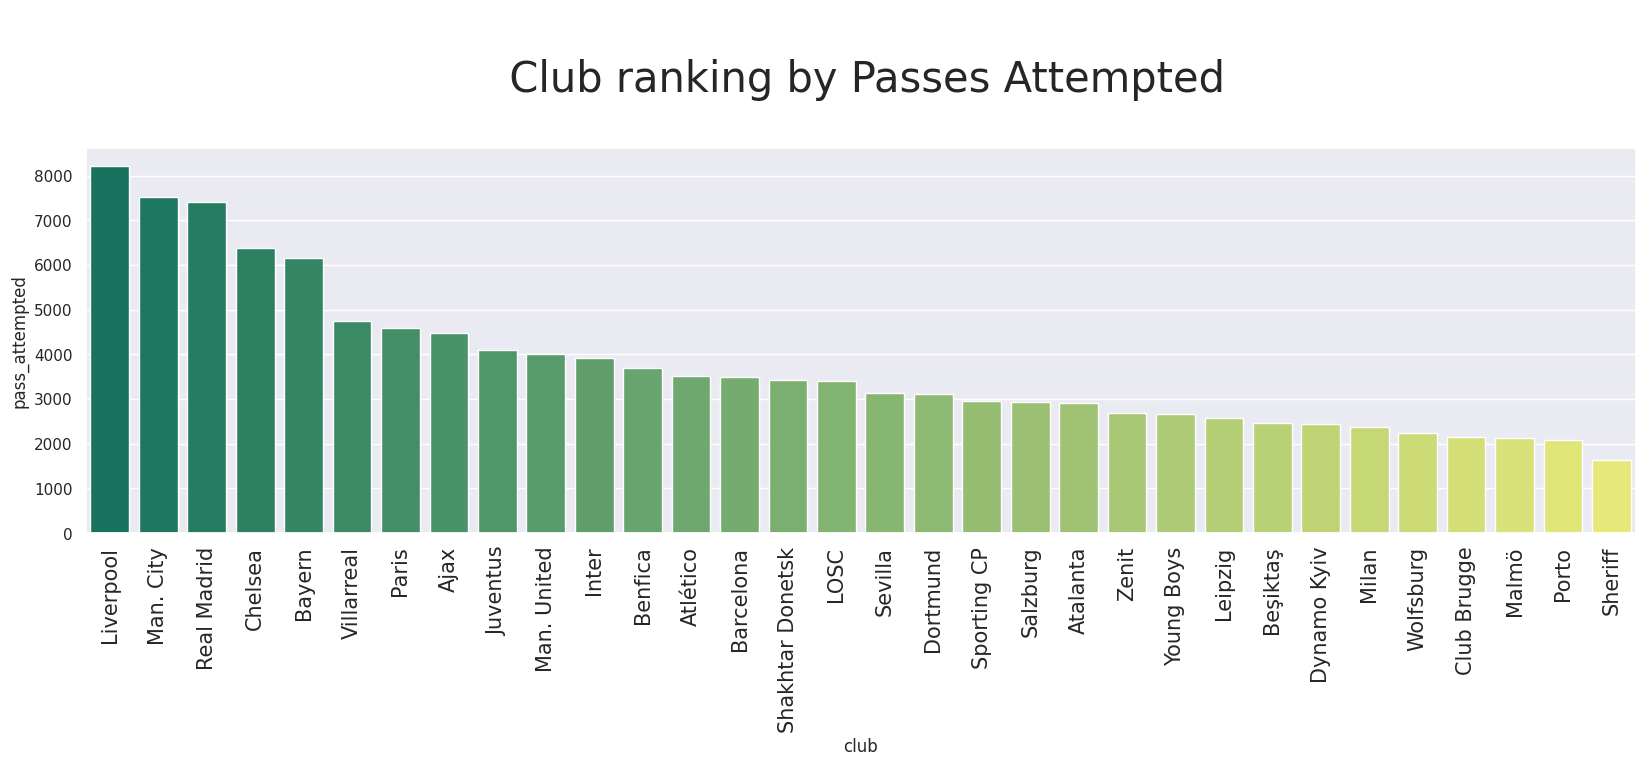

In [ ]:
g1=g1.sort_values('pass_attempted',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="pass_attempted", data=g1,palette="summer",capsize=2)
p.axes.set_title("\n Club ranking by Passes Attempted\n",fontsize=30);

In [ ]:
dis.head()

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played,ranking_points
0,1,Erokhin,Zenit,Midfielder,98.0,27,26,0,2,0,0,6,0.309945
1,2,Eric García,Barcelona,Defender,97.5,203,197,0,0,0,1,4,0.396106
2,3,Ulreich,Bayern,Goalkeeper,97.0,32,31,0,0,0,1,1,0.308907
3,4,Rugani,Juventus,Defender,96.8,130,122,0,0,0,0,4,0.354446
4,5,J. Timber,Ajax,Midfielder,95.8,497,474,0,1,0,14,8,0.561900


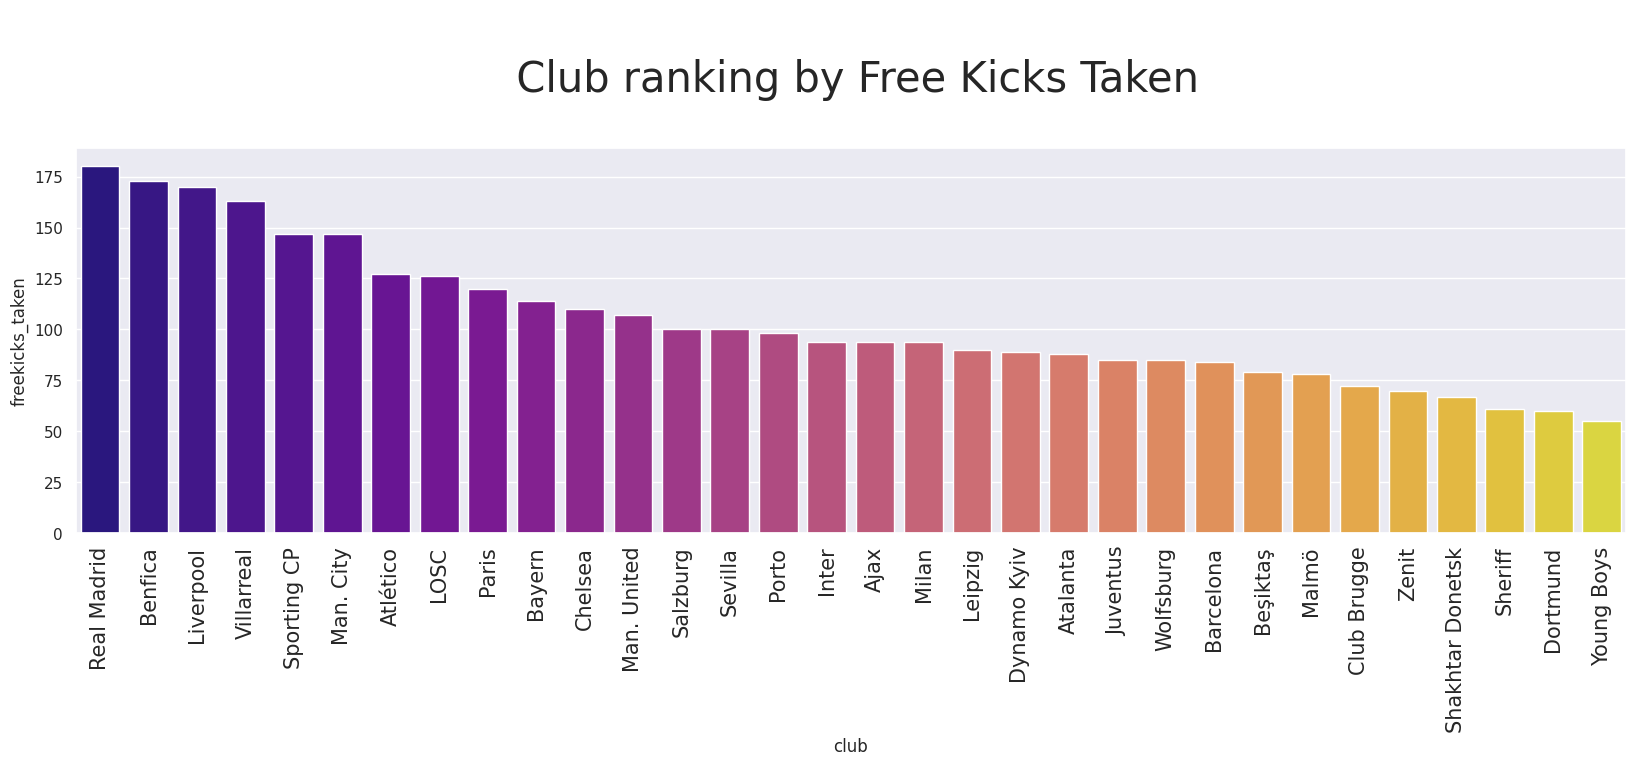

In [ ]:
g1=g1.sort_values('freekicks_taken',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="freekicks_taken", data=g1,palette="plasma",capsize=2)
p.axes.set_title("\n Club ranking by Free Kicks Taken\n",fontsize=30);

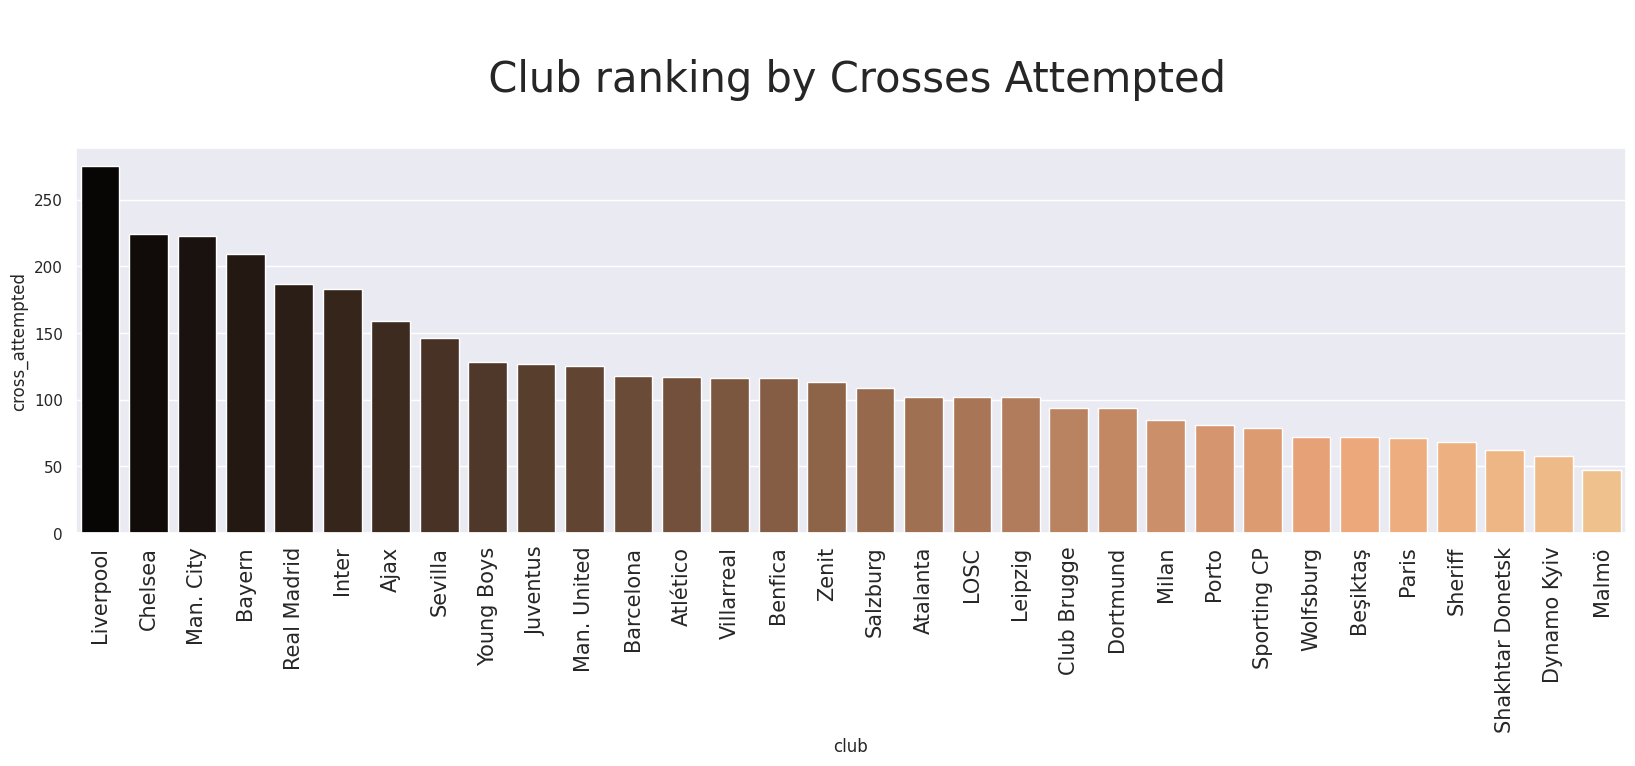

In [ ]:
g1=g1.sort_values('cross_attempted',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="cross_attempted", data=g1,palette="copper",capsize=2)
p.axes.set_title("\n Club ranking by Crosses Attempted\n",fontsize=30);

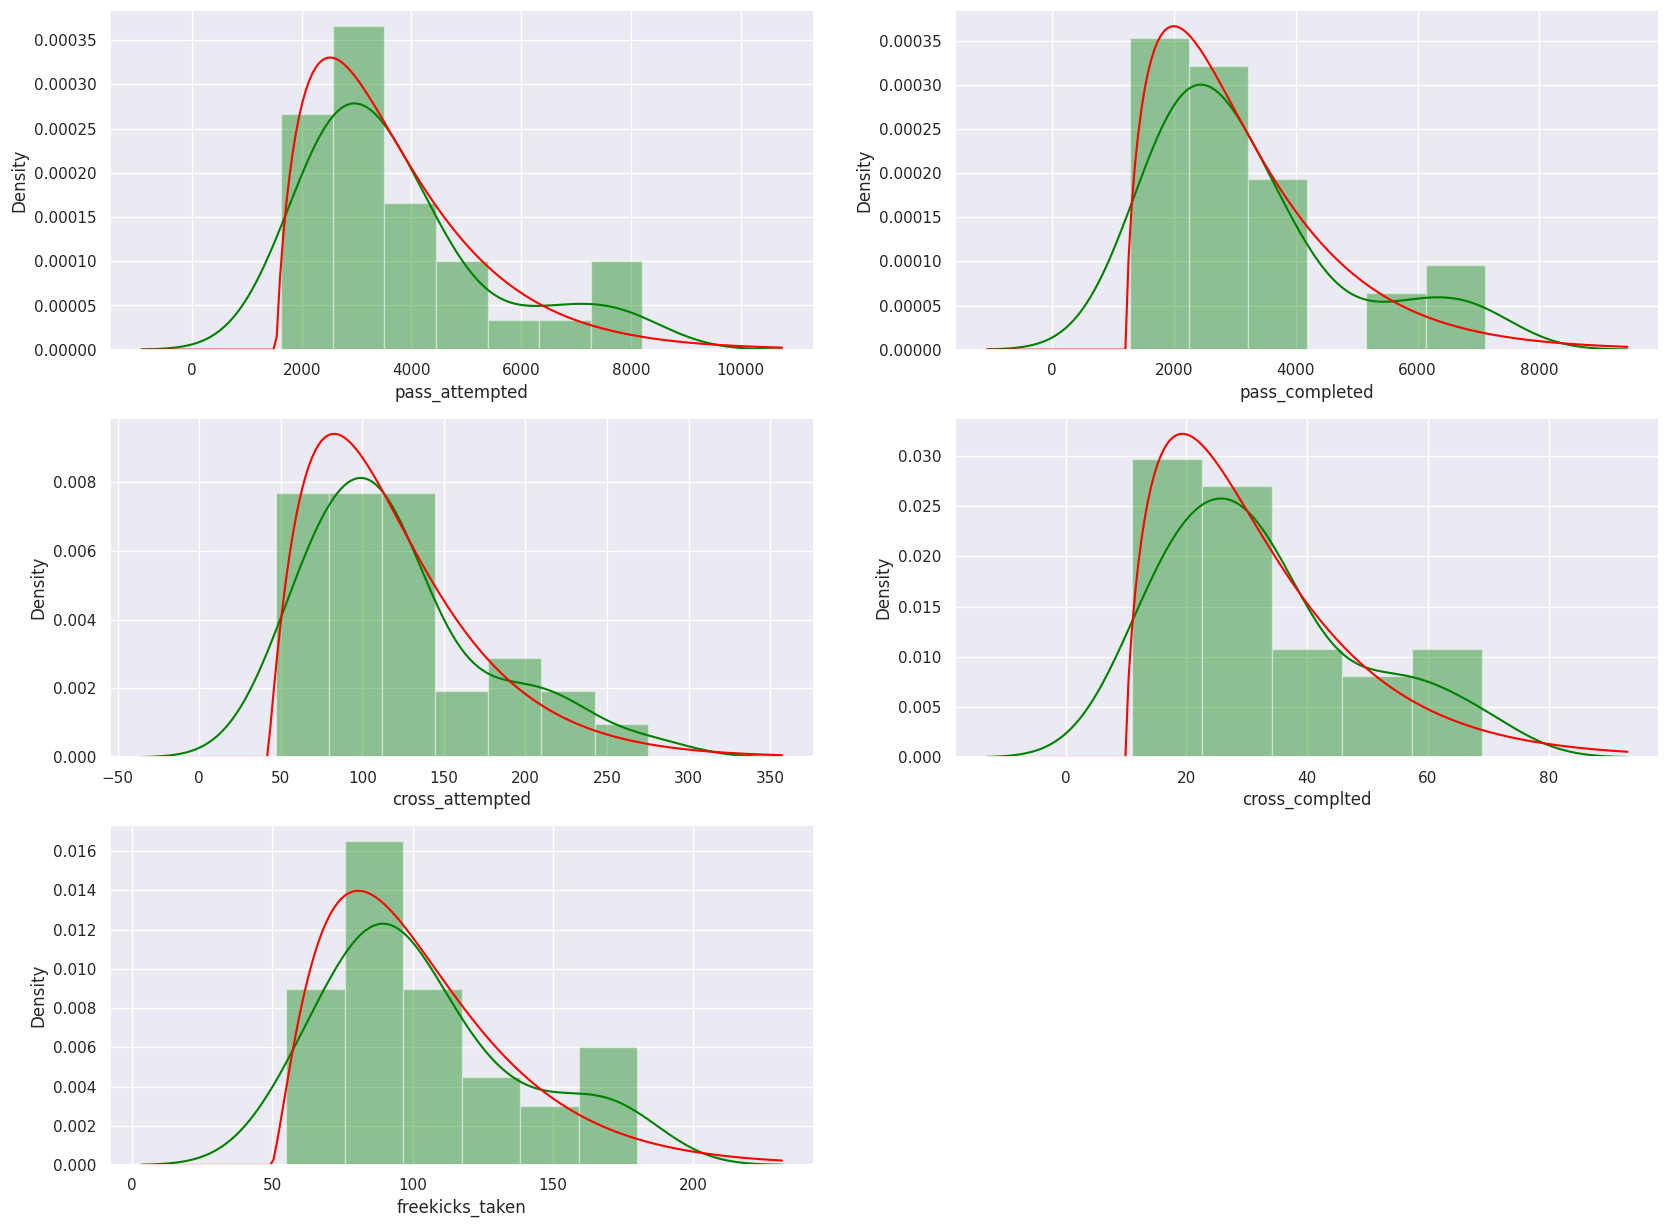

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})
for i, column in enumerate(["pass_attempted","pass_completed","cross_attempted","cross_complted","freekicks_taken"], 1):
    plt.subplot(3,2,i)
    p=sns.distplot(g1[column],color='green',fit_kws={"color":"red"},fit=stats.gamma, label="label 1")

In [ ]:
g2=dsp.groupby('club')[["fouls_committed","fouls_suffered","red","yellow"]].agg('sum').reset_index()

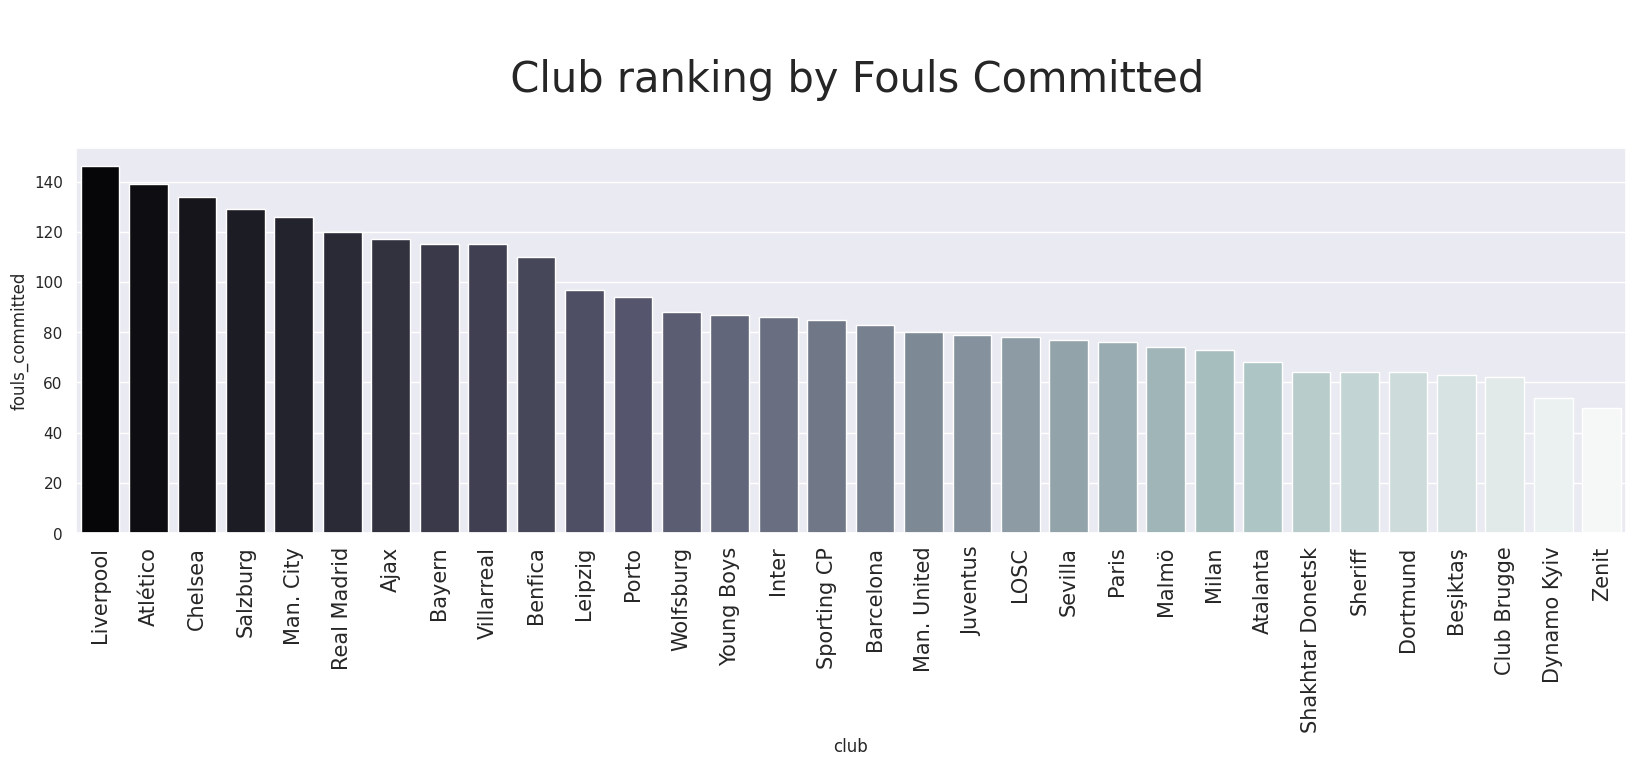

In [ ]:
g2=g2.sort_values('fouls_committed',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="club", y="fouls_committed", data=g2,palette="bone",capsize=2)
p.axes.set_title("\n Club ranking by Fouls Committed\n",fontsize=30);

<ipython-input-161-7f36562b02b8>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-161-7f36562b02b8>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




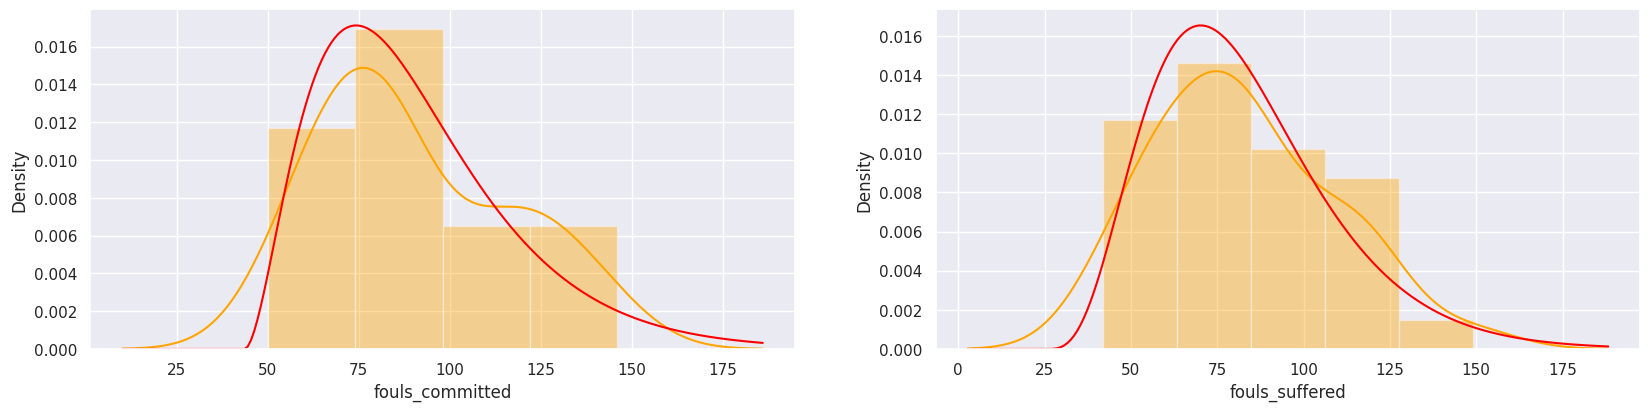

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})
for i, column in enumerate(["fouls_committed","fouls_suffered"], 1):
    plt.subplot(3,2,i)
    p=sns.distplot(g2[column],color='orange',fit_kws={"color":"red"},fit=stats.gamma, label="label 1")


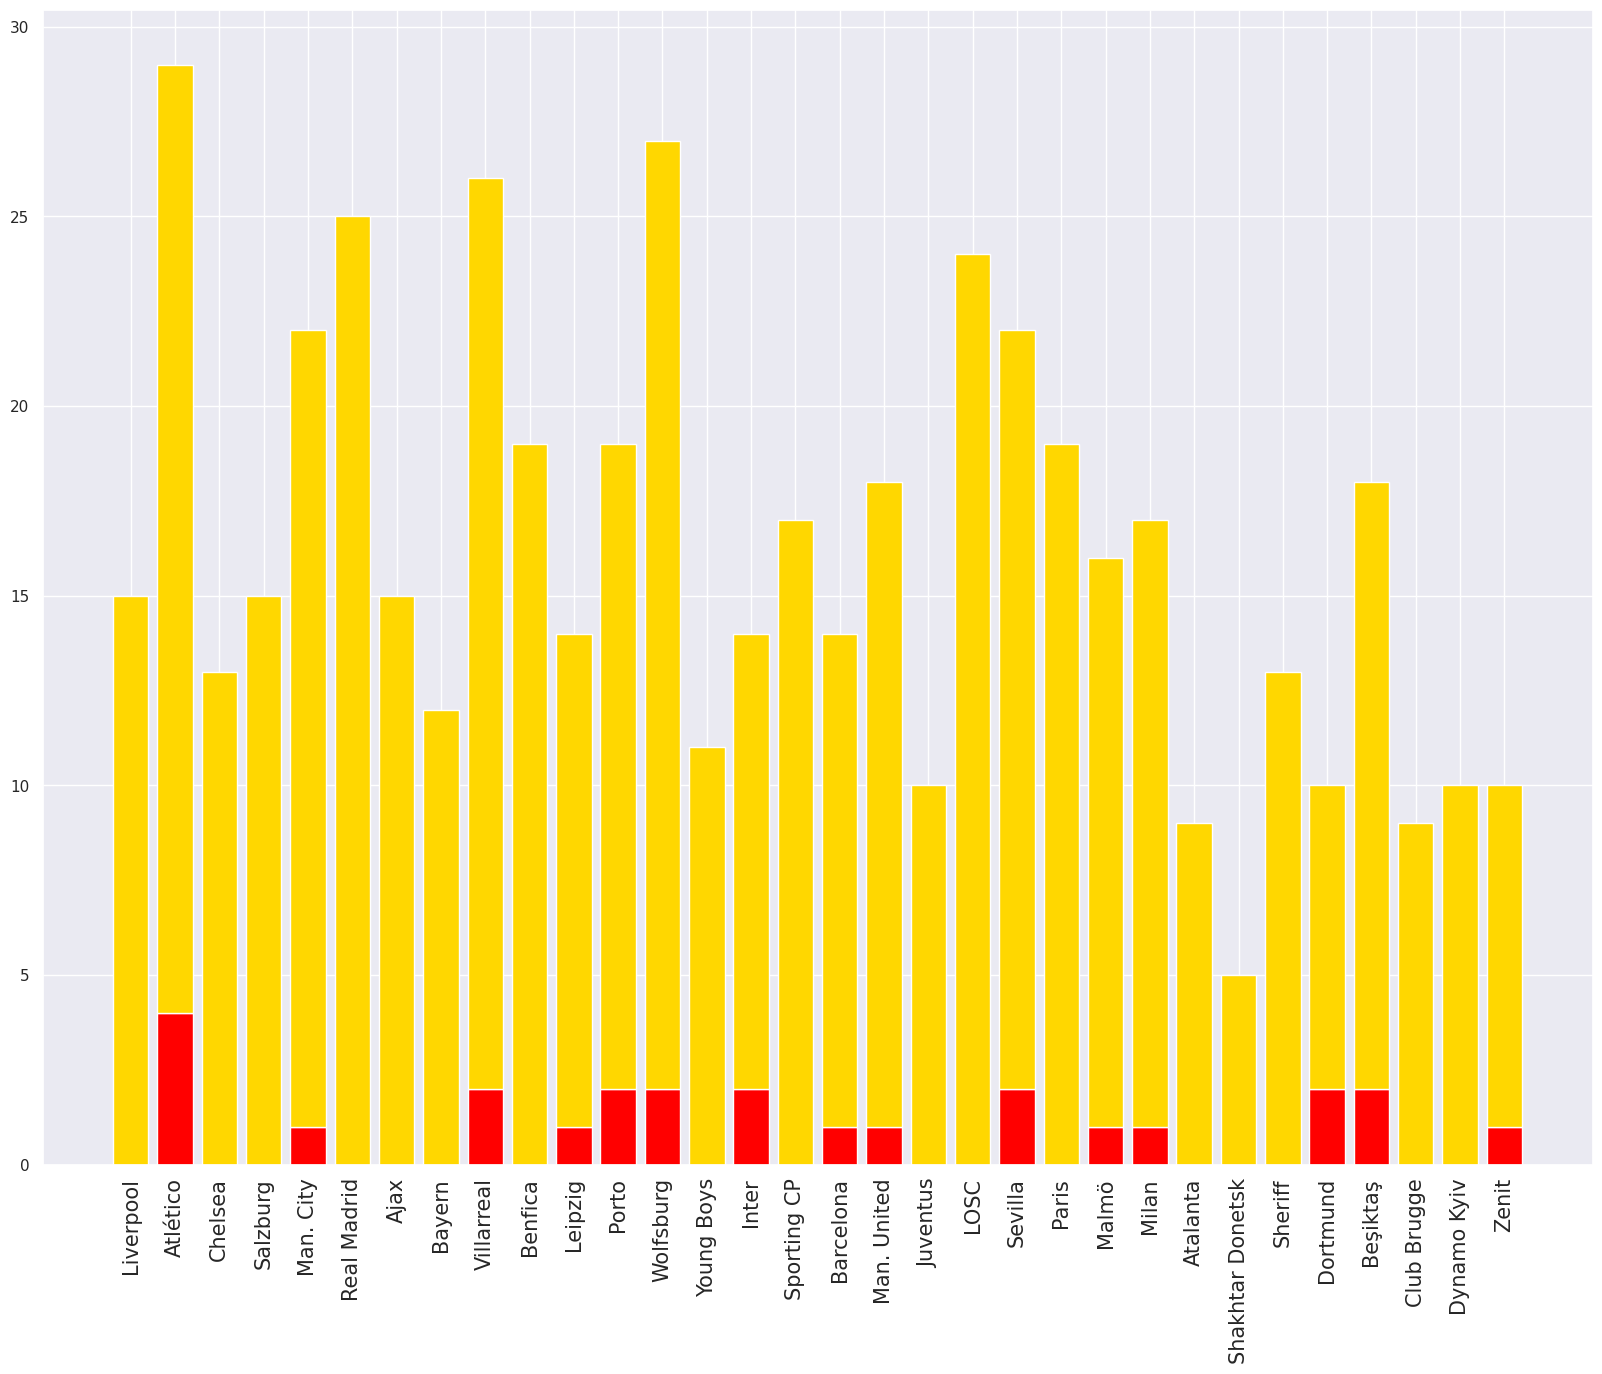

In [ ]:
plt.xticks(fontsize=15,rotation='vertical')
plt.bar(g2['club'], g2["yellow"], color='red')
plt.bar(g2['club'], g2["red"], bottom=g2["yellow"], color='gold')
plt.show()


<ipython-input-163-a0c5eb292c88>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

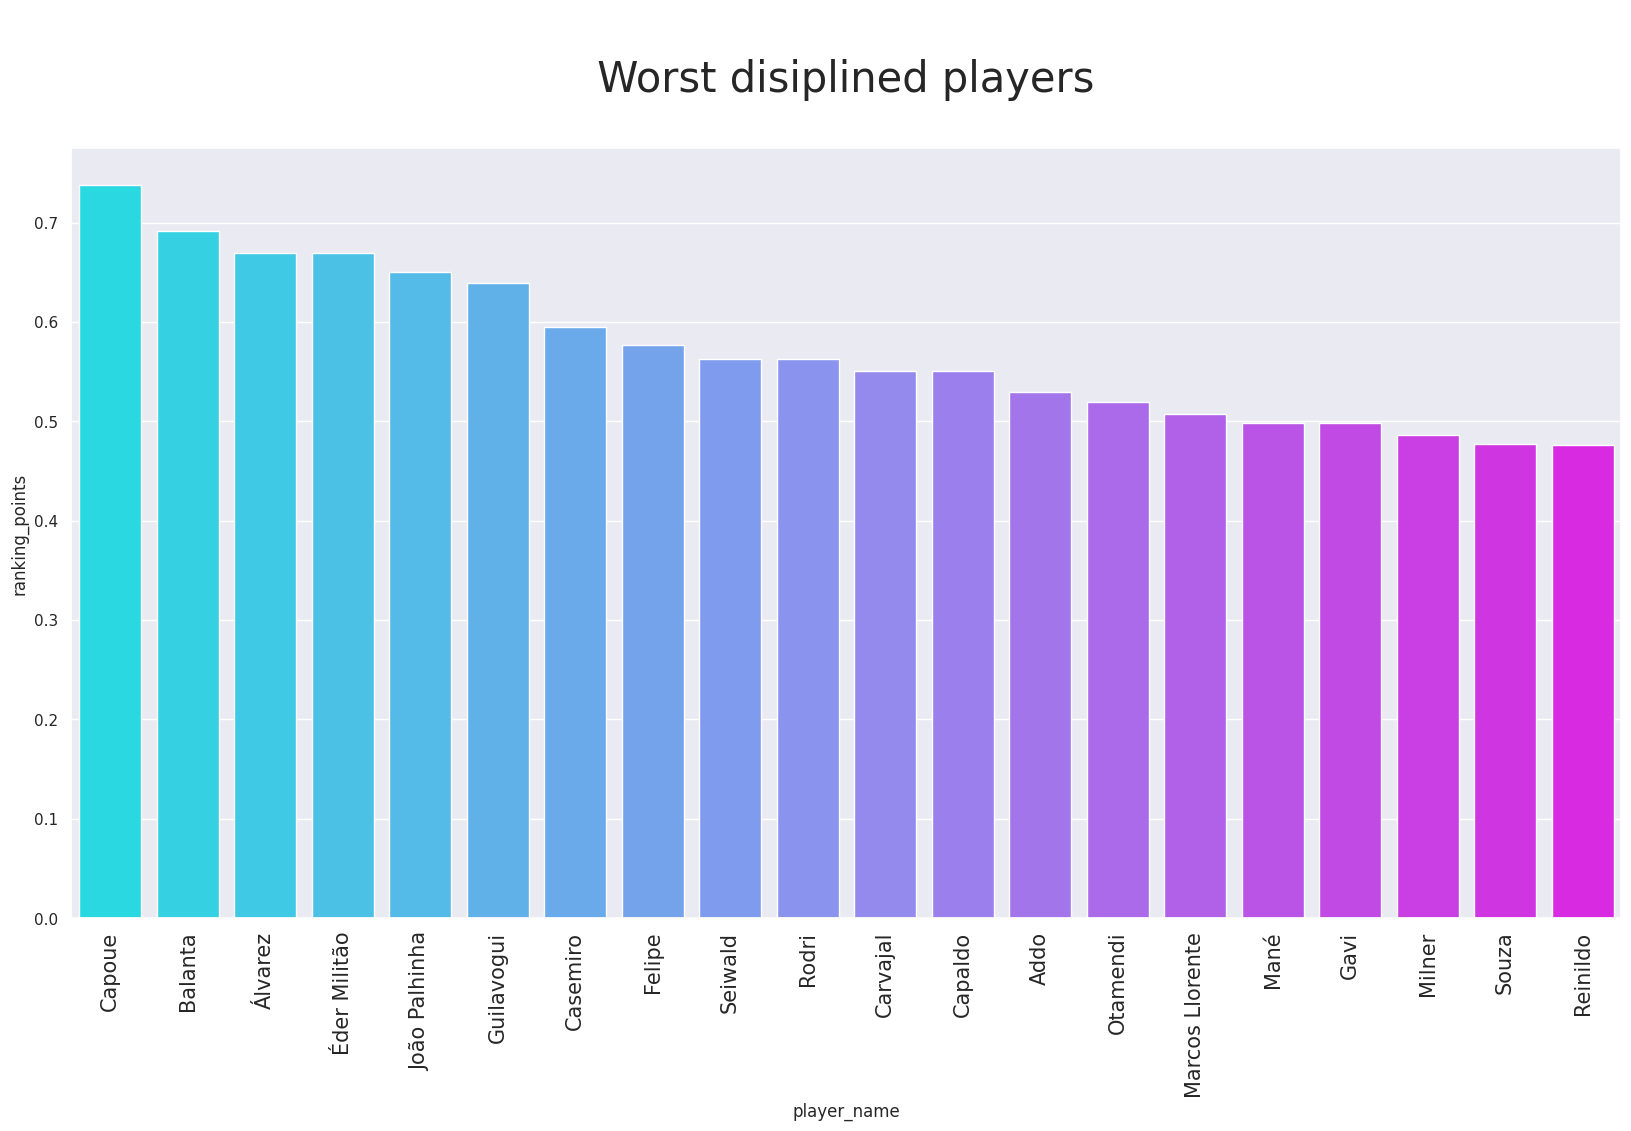

In [ ]:
dsp['ranking_points']=(dsp['fouls_committed']/dsp['fouls_committed'].max())*0.5+(dsp['red']/dsp['red'].max())*0.3+(dsp['yellow']/dsp['yellow'].max())*0.2
sns.set(rc={'figure.figsize':(20,10)})
dfnx=dsp.sort_values('ranking_points',ascending=False)
dfnx=dfnx[:20]
plt.xticks(fontsize=15,rotation='vertical')
p=sns.barplot(x="player_name", y="ranking_points", data=dfnx,palette="cool",capsize=2)
p.axes.set_title("\n Worst disiplined players \n",fontsize=30);